In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import multiprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
import zipfile
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

dataset_path = "/content/drive/MyDrive/ND/trashnet.zip"
unzip_dir = "/content/drive/MyDrive/ND/"

#Unzipping the dataset
# with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
#     zip_ref.extractall(unzip_dir)

In [4]:
#Verifying that the folders have been extracted
os.listdir(unzip_dir+'/dataset-resized')

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [5]:
#Updating unzipped dataset directory path
unzip_dir =  unzip_dir +'/dataset-resized'

In [6]:
import os
import random
from PIL import Image
import torchvision.transforms as transforms
from tqdm import tqdm  # For progress tracking

#Defining augmentations
augmentations = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),  #For flipping the image horizontally
    transforms.RandomRotation(20)  #For rotating the image randomly by ±20 degrees
])

#Defining image format for saving
IMAGE_FORMAT = "JPEG"

#Updating dataset path
dataset_path = "/content/drive/MyDrive/ND/dataset-resized"

#Getting class folders (cardboard, glass, plastic, ...)
classes = os.listdir(dataset_path)

In [7]:
classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [29]:
#Looping through each class folder
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    # print("Class path", class_path)
    #Ensuring it's a directory
    if not os.path.isdir(class_path):
        continue

    print(f"Processing class: {class_name}")

    #Looping through images in the folder
    for img_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)

        #Opening the image
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Skipping {img_name}, error: {e}")
            continue

        #Applying augmentations
        augmented_image_1 = augmentations(image)  # Flipped/Rotated image
        augmented_image_2 = augmentations(image)  # Another variation

        #Saving the augmented images with new names
        base_name, ext = os.path.splitext(img_name)
        aug_img_path_1 = os.path.join(class_path, f"{base_name}_aug1.{IMAGE_FORMAT.lower()}")
        aug_img_path_2 = os.path.join(class_path, f"{base_name}_aug2.{IMAGE_FORMAT.lower()}")

        augmented_image_1.save(aug_img_path_1, IMAGE_FORMAT)
        augmented_image_2.save(aug_img_path_2, IMAGE_FORMAT)

print("Augmentation complete. New images have been saved.")

Class path /content/drive/MyDrive/ND/dataset-resized/cardboard
Processing class: cardboard


  0%|          | 0/2729 [00:00<?, ?it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug2.jpeg


  0%|          | 3/2729 [00:00<01:54, 23.83it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug2.jpeg


  0%|          | 6/2729 [00:00<01:50, 24.55it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard104_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard104_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard107_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard107_aug2.jpeg


  0%|          | 13/2729 [00:43<2:30:36,  3.33s/it]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard109_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard109_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug2.jpeg


  1%|          | 17/2729 [00:43<1:13:38,  1.63s/it]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard111_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard111_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard113_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard113_aug2.jpeg


  1%|          | 20/2729 [00:43<45:15,  1.00s/it]  

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard115_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard115_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug2.jpeg


  1%|          | 25/2729 [00:44<22:55,  1.97it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard12_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard12_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard121_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard121_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug2.jpeg
Augmented im

  1%|          | 31/2729 [00:44<11:21,  3.96it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard126_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard126_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard128_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard128_aug2.jpeg


  1%|▏         | 36/2729 [00:44<06:45,  6.65it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard13_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard13_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard131_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard131_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug2.jpeg


  2%|▏         | 42/2729 [00:44<03:57, 11.33it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard134_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard134_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard136_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard136_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard137_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard137_aug2.jpeg


  2%|▏         | 48/2729 [00:45<03:02, 14.65it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard139_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard139_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard140_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard140_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug2.jpeg
Augmented im

  2%|▏         | 51/2729 [00:45<02:44, 16.26it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard145_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard145_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard147_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard147_aug2.jpeg


  2%|▏         | 57/2729 [00:45<02:16, 19.62it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard148_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard148_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard150_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard150_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug2.jpeg


  2%|▏         | 63/2729 [00:45<02:02, 21.81it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard152_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard152_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard153_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard153_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard154_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard154_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard155_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard155_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug2.jpeg
Augmented 

  3%|▎         | 69/2729 [00:46<01:58, 22.40it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard16_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard16_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug2.jpeg


  3%|▎         | 75/2729 [00:46<02:00, 22.11it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard162_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard162_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard163_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard163_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard166_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard166_aug2.jpeg


  3%|▎         | 78/2729 [00:46<01:58, 22.33it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard167_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard167_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard168_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard168_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard17_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard17_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard170_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard170_aug2.jpeg


  3%|▎         | 84/2729 [00:46<01:54, 23.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard171_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard171_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard173_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard173_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug2.jpeg


  3%|▎         | 87/2729 [00:46<01:53, 23.31it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard176_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard176_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard177_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard177_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard18_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard18_aug2.jpeg


  3%|▎         | 93/2729 [00:47<01:54, 23.04it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard181_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard181_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard183_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard183_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug2.jpeg
Augmented 

  4%|▎         | 99/2729 [00:47<01:50, 23.87it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard186_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard186_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard188_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard188_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard19_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard19_aug2.jpeg


  4%|▍         | 105/2729 [00:47<01:51, 23.50it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard192_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard192_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard194_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard194_aug2.jpeg


  4%|▍         | 108/2729 [00:47<01:48, 24.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard196_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard196_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard197_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard197_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard198_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard198_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug2.jpeg


  4%|▍         | 114/2729 [00:48<01:47, 24.27it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard20_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard20_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard201_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard201_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug2.jpeg


  4%|▍         | 120/2729 [00:48<01:45, 24.69it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard203_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard203_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard204_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard204_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard205_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard205_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard206_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard206_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug2.jpeg
Augmented 

  5%|▍         | 126/2729 [00:48<01:47, 24.16it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard21_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard21_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard210_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard210_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard212_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard212_aug2.jpeg


  5%|▍         | 132/2729 [00:48<01:46, 24.48it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard214_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard214_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard216_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard216_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug2.jpeg


  5%|▍         | 135/2729 [00:48<01:49, 23.72it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard218_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard218_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard219_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard219_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard220_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard220_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug2.jpeg
Augmented im

  5%|▌         | 141/2729 [00:49<01:47, 24.07it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard224_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard224_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard226_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard226_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard227_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard227_aug2.jpeg
Augmented 

  5%|▌         | 148/2729 [00:49<01:41, 25.54it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard229_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard229_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard230_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard230_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard232_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard232_aug2.jpeg
Augmented im

  6%|▌         | 154/2729 [00:49<01:51, 23.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard234_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard234_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard236_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard236_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard238_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard238_aug2.jpeg
Augmented 

  6%|▌         | 160/2729 [00:50<01:46, 24.19it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard240_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard240_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard243_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard243_aug2.jpeg
Augmented im

  6%|▌         | 166/2729 [00:50<01:40, 25.44it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard245_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard245_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard247_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard247_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug2.jpeg
Augmented 

  6%|▋         | 172/2729 [00:50<01:42, 24.83it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard252_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard252_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug2.jpeg


  7%|▋         | 178/2729 [00:50<01:46, 23.97it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard255_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard255_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard256_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard256_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard259_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard259_aug2.jpeg


  7%|▋         | 181/2729 [00:50<01:49, 23.37it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard26_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard26_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard262_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard262_aug2.jpeg


  7%|▋         | 184/2729 [00:51<03:27, 12.29it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard265_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard265_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard266_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard266_aug2.jpeg


  7%|▋         | 188/2729 [00:51<03:02, 13.95it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard268_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard268_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard269_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard269_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard27_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard27_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug2.jpeg


  7%|▋         | 194/2729 [00:51<02:21, 17.93it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard271_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard271_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard273_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard273_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug2.jpeg


  7%|▋         | 199/2729 [00:52<02:21, 17.87it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard275_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard275_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard277_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard277_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard278_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard278_aug2.jpeg


  7%|▋         | 203/2729 [00:52<02:16, 18.52it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard279_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard279_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard28_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard28_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard281_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard281_aug2.jpeg


  8%|▊         | 206/2729 [00:52<02:00, 20.90it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard282_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard282_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard284_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard284_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard285_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard285_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug2.jpeg
Augmented 

  8%|▊         | 214/2729 [00:52<01:35, 26.37it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard288_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard288_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard289_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard289_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard290_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard290_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug2.jpeg
Augmented im

  8%|▊         | 217/2729 [00:52<01:46, 23.65it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard294_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard294_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard296_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard296_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard297_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard297_aug2.jpeg


  8%|▊         | 223/2729 [00:53<02:11, 19.00it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard298_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard298_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard3_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard3_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard30_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard30_aug2.jpeg


  8%|▊         | 226/2729 [00:53<01:59, 20.90it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard302_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard302_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard303_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard303_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug2.jpeg


  9%|▊         | 232/2729 [00:53<01:58, 21.08it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard306_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard306_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard309_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard309_aug2.jpeg


  9%|▊         | 238/2729 [00:53<01:54, 21.72it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard31_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard31_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard312_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard312_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug2.jpeg


  9%|▉         | 244/2729 [00:54<01:50, 22.42it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard314_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard314_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard315_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard315_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard317_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard317_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug2.jpeg


  9%|▉         | 247/2729 [00:54<01:46, 23.34it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard319_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard319_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard320_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard320_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard321_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard321_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard322_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard322_aug2.jpeg
Augmented im

  9%|▉         | 253/2729 [00:54<01:41, 24.50it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard325_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard325_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard327_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard327_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard328_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard328_aug2.jpeg


  9%|▉         | 259/2729 [00:54<02:00, 20.50it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard33_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard33_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard331_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard331_aug2.jpeg


 10%|▉         | 262/2729 [00:55<02:16, 18.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard334_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard334_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug2.jpeg


 10%|▉         | 267/2729 [00:55<02:14, 18.30it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard337_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard337_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard339_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard339_aug2.jpeg


 10%|▉         | 270/2729 [00:55<02:04, 19.77it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard340_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard340_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard343_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard343_aug2.jpeg


 10%|█         | 276/2729 [00:55<02:02, 20.07it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard346_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard346_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug2.jpeg


 10%|█         | 279/2729 [00:56<02:01, 20.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard349_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard349_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard35_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard35_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard350_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard350_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug2.jpeg


 10%|█         | 284/2729 [00:56<02:09, 18.95it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard352_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard352_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard353_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard353_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug2.jpeg


 11%|█         | 288/2729 [00:56<02:10, 18.76it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard356_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard356_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard359_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard359_aug2.jpeg


 11%|█         | 293/2729 [00:56<02:07, 19.16it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug2.jpeg


 11%|█         | 295/2729 [00:56<02:10, 18.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard365_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard365_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug2.jpeg


 11%|█         | 299/2729 [00:57<02:09, 18.83it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard369_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard369_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard370_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard370_aug2.jpeg


 11%|█         | 305/2729 [00:57<01:52, 21.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard371_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard371_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard373_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard373_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard375_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard375_aug2.jpeg


 11%|█▏        | 312/2729 [00:57<01:42, 23.56it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard377_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard377_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard379_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard379_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard38_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard38_aug2.jpeg
Augmented im

 12%|█▏        | 318/2729 [00:57<01:45, 22.79it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard382_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard382_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard385_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard385_aug2.jpeg


 12%|█▏        | 321/2729 [00:58<01:51, 21.69it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard387_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard387_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard39_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard39_aug2.jpeg


 12%|█▏        | 327/2729 [00:58<01:56, 20.64it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard391_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard391_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard393_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard393_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug2.jpeg
Augmented 

 12%|█▏        | 330/2729 [00:58<02:36, 15.35it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard397_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard397_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug2.jpeg


 12%|█▏        | 334/2729 [00:59<03:11, 12.50it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard399_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard399_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard40_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard40_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug2.jpeg


 12%|█▏        | 340/2729 [00:59<02:24, 16.58it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard402_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard402_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard41_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard41_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard43_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard43_aug2.jpeg


 13%|█▎        | 345/2729 [00:59<02:11, 18.14it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard44_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard44_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard46_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard46_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard47_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard47_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard48_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard48_aug2.jpeg


 13%|█▎        | 352/2729 [00:59<01:50, 21.47it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard50_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard50_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug2.jpeg


 13%|█▎        | 355/2729 [01:00<02:04, 19.00it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard53_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard53_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard56_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard56_aug2.jpeg


 13%|█▎        | 361/2729 [01:00<01:46, 22.19it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard57_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard57_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard58_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard58_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard6_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard6_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard60_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard60_aug2.jpeg
Augmented image 1 path

 13%|█▎        | 367/2729 [01:00<01:37, 24.19it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard62_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard62_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard63_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard63_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard65_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard65_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug2.jpeg
Augmented image 1 pa

 14%|█▎        | 370/2729 [01:00<01:40, 23.56it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard7_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard7_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard71_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard71_aug2.jpeg


 14%|█▍        | 376/2729 [01:00<01:40, 23.49it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard72_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard72_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard75_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard75_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug2.jpeg
Augmented image 1 pa

 14%|█▍        | 382/2729 [01:01<01:39, 23.53it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard79_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard79_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard8_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard8_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard80_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard80_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard81_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard81_aug2.jpeg


 14%|█▍        | 388/2729 [01:01<01:35, 24.39it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard82_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard82_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard83_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard83_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard84_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard84_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard85_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard85_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard86_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard86_aug2.jpeg
Augmented image 1 pa

 14%|█▍        | 394/2729 [01:01<01:40, 23.22it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard88_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard88_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard89_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard89_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard9_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard9_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard90_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard90_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard91_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard91_aug2.jpeg
Augmented image 1 path

 15%|█▍        | 400/2729 [01:01<01:40, 23.29it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard93_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard93_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard94_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard94_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard95_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard95_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard96_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard96_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard97_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard97_aug2.jpeg


 15%|█▍        | 403/2729 [01:02<01:36, 24.16it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard98_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard98_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard99_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard99_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug1_aug2

 15%|█▍        | 409/2729 [01:02<01:45, 22.02it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/

 15%|█▌        | 415/2729 [01:02<01:47, 21.61it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard104_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 15%|█▌        | 418/2729 [01:02<02:07, 18.06it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard104_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard104_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 16%|█▌        | 424/2729 [01:03<01:51, 20.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard107_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard107_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard107_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard107_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard109_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 16%|█▌        | 430/2729 [01:03<01:55, 19.93it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard111_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 16%|█▌        | 436/2729 [01:03<01:54, 20.03it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard111_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard111_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard113_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard113_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard113_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 16%|█▌        | 442/2729 [01:04<01:46, 21.57it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard115_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard115_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard115_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard115_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 16%|█▋        | 445/2729 [01:04<01:56, 19.53it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 17%|█▋        | 451/2729 [01:04<01:48, 21.08it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard12_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard12_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard12_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard12_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 17%|█▋        | 457/2729 [01:04<01:49, 20.84it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard121_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard121_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard121_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard121_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug2_aug2.jpeg


 17%|█▋        | 460/2729 [01:04<01:45, 21.53it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard123_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard123_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard123_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard123_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 17%|█▋        | 466/2729 [01:05<01:41, 22.20it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard126_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard126_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard126_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard126_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 17%|█▋        | 469/2729 [01:05<01:47, 20.98it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard128_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard128_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard128_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard128_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug2_aug2.jpeg


 17%|█▋        | 475/2729 [01:05<01:46, 21.23it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard13_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard13_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard13_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard13_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard131_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 18%|█▊        | 481/2729 [01:05<01:38, 22.71it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard131_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard131_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 18%|█▊        | 487/2729 [01:06<01:37, 22.94it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard134_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard134_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard136_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard136_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard136_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 18%|█▊        | 490/2729 [01:06<01:43, 21.60it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard137_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard137_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard139_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard139_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard139_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 18%|█▊        | 496/2729 [01:06<01:59, 18.64it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard140_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard140_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard140_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard140_aug2_aug2.jpeg


 18%|█▊        | 499/2729 [01:06<02:05, 17.78it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard142_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard142_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard142_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard142_aug2_aug2.jpeg


 18%|█▊        | 504/2729 [01:07<01:59, 18.55it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard145_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 19%|█▊        | 511/2729 [01:07<01:34, 23.46it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard145_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard145_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard147_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard147_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard147_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 19%|█▉        | 517/2729 [01:07<01:29, 24.77it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard150_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 19%|█▉        | 525/2729 [01:07<01:17, 28.41it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard152_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard152_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard152_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard152_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard153_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 19%|█▉        | 532/2729 [01:08<01:13, 29.72it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard154_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard154_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard155_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard155_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard155_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard155_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 20%|█▉        | 540/2729 [01:08<01:08, 31.80it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard16_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized

 20%|█▉        | 544/2729 [01:08<01:09, 31.30it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard162_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard162_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard162_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 20%|██        | 552/2729 [01:08<01:06, 32.50it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard166_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 21%|██        | 560/2729 [01:08<01:03, 34.25it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard168_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard168_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard168_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard168_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard17_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized

 21%|██        | 568/2729 [01:09<01:04, 33.70it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard170_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard170_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard171_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard171_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard171_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard171_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 21%|██        | 576/2729 [01:09<01:02, 34.35it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard176_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard176_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard176_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 21%|██▏       | 580/2729 [01:09<01:04, 33.35it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard18_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized

 22%|██▏       | 588/2729 [01:09<01:08, 31.18it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard181_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard181_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard181_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard181_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 22%|██▏       | 596/2729 [01:10<01:11, 29.99it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard183_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard183_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard185_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard185_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard185_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 22%|██▏       | 600/2729 [01:10<01:10, 30.28it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard188_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard188_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard188_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard188_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 22%|██▏       | 608/2729 [01:10<01:19, 26.57it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard19_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard19_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/

 22%|██▏       | 614/2729 [01:10<01:21, 26.06it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard192_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard192_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard192_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard192_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard194_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 23%|██▎       | 618/2729 [01:10<01:18, 27.03it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard196_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard196_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard196_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard196_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard197_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 23%|██▎       | 625/2729 [01:11<01:13, 28.66it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard198_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard198_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/card

 23%|██▎       | 631/2729 [01:11<01:17, 26.93it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard20_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard20_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard201_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard201_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard201_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/

 23%|██▎       | 638/2729 [01:11<01:15, 27.74it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard203_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard203_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard203_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard203_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard204_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard204_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard204_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 24%|██▎       | 645/2729 [01:11<01:16, 27.36it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard205_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard205_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard206_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard206_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard206_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard206_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 24%|██▍       | 652/2729 [01:12<01:12, 28.68it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard21_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard21_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard21_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard21_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard210_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 24%|██▍       | 659/2729 [01:12<01:13, 28.07it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard212_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard212_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard212_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard212_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 24%|██▍       | 662/2729 [01:12<01:27, 23.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard214_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard214_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug2_aug2.jpeg


 24%|██▍       | 668/2729 [01:12<01:32, 22.37it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard216_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard216_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard216_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard216_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard218_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 25%|██▍       | 672/2729 [01:12<01:25, 23.97it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard219_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard219_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard219_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard219_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard220_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 25%|██▍       | 679/2729 [01:13<01:18, 26.19it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard222_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard222_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard222_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard222_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 25%|██▌       | 689/2729 [01:13<01:15, 26.95it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard226_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard226_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard226_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard226_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard227_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 25%|██▌       | 692/2729 [01:13<01:15, 26.85it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard228_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard228_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard228_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard228_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard229_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard229_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard229_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard229_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized

 26%|██▌       | 699/2729 [01:13<01:11, 28.46it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard230_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard230_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard232_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard232_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard232_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 26%|██▌       | 705/2729 [01:14<01:31, 22.18it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard234_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard234_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard234_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard234_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 26%|██▌       | 710/2729 [01:14<02:45, 12.17it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard236_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard236_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard236_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard236_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 26%|██▋       | 718/2729 [01:15<01:43, 19.41it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard238_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard238_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard238_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard238_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard239_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard239_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard239_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard239_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized

 26%|██▋       | 722/2729 [01:15<01:29, 22.52it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard240_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard240_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 27%|██▋       | 730/2729 [01:15<01:12, 27.71it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard245_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard245_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard245_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard245_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 27%|██▋       | 738/2729 [01:15<01:05, 30.17it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard247_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard247_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 27%|██▋       | 746/2729 [01:16<01:01, 32.08it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard252_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 27%|██▋       | 750/2729 [01:16<01:01, 32.18it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard255_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard255_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard255_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 28%|██▊       | 758/2729 [01:16<01:02, 31.45it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard259_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 28%|██▊       | 766/2729 [01:16<01:03, 31.03it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard26_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard26_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/

 28%|██▊       | 774/2729 [01:16<00:59, 32.84it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard265_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 29%|██▊       | 778/2729 [01:17<01:00, 32.39it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard266_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard266_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard268_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard268_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard268_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 29%|██▉       | 786/2729 [01:17<01:00, 32.22it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard27_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard27_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard27_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard27_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard271_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 29%|██▉       | 794/2729 [01:17<00:59, 32.60it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard273_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard273_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard273_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard273_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 29%|██▉       | 802/2729 [01:17<00:57, 33.23it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard277_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard277_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard277_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard277_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard278_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 30%|██▉       | 806/2729 [01:17<01:00, 31.66it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard279_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard279_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard28_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard28_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard28_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard28_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 30%|██▉       | 814/2729 [01:18<00:59, 32.18it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard282_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard282_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard282_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard282_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard284_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 30%|███       | 822/2729 [01:18<01:01, 30.78it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard285_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard285_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard287_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard287_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard287_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 30%|███       | 826/2729 [01:18<01:01, 30.89it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard289_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard289_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard289_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard289_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard290_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 31%|███       | 834/2729 [01:18<00:59, 31.60it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard292_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard292_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard292_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard292_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard293_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard293_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard293_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 31%|███       | 842/2729 [01:19<00:57, 32.76it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard296_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard296_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard296_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard296_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard297_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 31%|███       | 850/2729 [01:19<00:57, 32.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard298_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard298_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard3_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard3_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard3_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/card

 31%|███▏      | 854/2729 [01:19<00:56, 32.93it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard302_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 32%|███▏      | 861/2729 [01:19<01:03, 29.23it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard303_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard303_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 32%|███▏      | 869/2729 [01:19<01:02, 29.90it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard309_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 32%|███▏      | 877/2729 [01:20<01:02, 29.76it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard31_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard31_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/

 32%|███▏      | 885/2729 [01:20<01:00, 30.71it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard314_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard314_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard314_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard314_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard315_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 33%|███▎      | 889/2729 [01:20<01:02, 29.53it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard317_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard317_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard317_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard317_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 33%|███▎      | 897/2729 [01:20<00:58, 31.55it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard320_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard320_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard320_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard320_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard321_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 33%|███▎      | 905/2729 [01:21<00:58, 31.05it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard322_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard322_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard323_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard323_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard323_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard323_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 33%|███▎      | 913/2729 [01:21<00:56, 31.90it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard327_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard327_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard327_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard327_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard328_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 34%|███▎      | 917/2729 [01:21<00:56, 32.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard33_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard33_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard33_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard33_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 34%|███▍      | 925/2729 [01:21<00:58, 30.84it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard334_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 34%|███▍      | 933/2729 [01:22<00:57, 31.00it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard337_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 34%|███▍      | 937/2729 [01:22<01:07, 26.39it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard339_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard339_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard339_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard339_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/c

 35%|███▍      | 944/2729 [01:22<01:02, 28.63it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard340_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard340_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 35%|███▍      | 952/2729 [01:22<00:56, 31.35it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard346_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 35%|███▌      | 960/2729 [01:22<00:56, 31.57it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard349_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard349_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard349_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 35%|███▌      | 964/2729 [01:23<00:54, 32.55it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard350_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard350_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard350_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard350_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard352_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 36%|███▌      | 972/2729 [01:23<00:56, 30.86it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard353_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard353_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 36%|███▌      | 980/2729 [01:23<00:55, 31.34it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard359_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 36%|███▌      | 984/2729 [01:23<00:57, 30.25it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 36%|███▋      | 991/2729 [01:23<01:03, 27.32it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 37%|███▋      | 997/2729 [01:24<01:02, 27.65it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard365_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard365_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard365_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard365_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 37%|███▋      | 1000/2729 [01:24<01:11, 24.35it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard369_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard369_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard369_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 37%|███▋      | 1006/2729 [01:24<01:11, 24.23it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard370_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard370_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard370_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard370_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard371_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 37%|███▋      | 1012/2729 [01:24<01:10, 24.28it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard371_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard371_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard373_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard373_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard373_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 37%|███▋      | 1019/2729 [01:25<01:02, 27.26it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard375_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard375_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard375_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard375_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 38%|███▊      | 1025/2729 [01:25<01:09, 24.60it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard379_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard379_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard379_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard379_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard38_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized

 38%|███▊      | 1031/2729 [01:25<01:07, 25.12it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard380_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard380_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard380_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard380_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard382_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 38%|███▊      | 1038/2729 [01:25<01:03, 26.71it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard385_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 38%|███▊      | 1045/2729 [01:26<00:59, 28.16it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard387_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard387_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard387_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard387_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 38%|███▊      | 1048/2729 [01:26<01:02, 26.87it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard39_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard39_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard39_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard39_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/ca

 39%|███▊      | 1054/2729 [01:26<01:09, 24.11it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard391_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard391_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard391_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard391_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 39%|███▉      | 1060/2729 [01:26<01:04, 25.71it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard393_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard393_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard395_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard395_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard395_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 39%|███▉      | 1063/2729 [01:26<01:13, 22.79it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard396_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard396_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard397_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard397_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard397_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard397_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resize

 39%|███▉      | 1073/2729 [01:27<01:02, 26.60it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard399_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard399_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard399_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard399_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard40_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 39%|███▉      | 1076/2729 [01:27<01:03, 26.17it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug2_aug2.jpeg


 40%|███▉      | 1082/2729 [01:27<01:09, 23.74it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard402_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard402_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard402_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard402_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard41_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized

 40%|███▉      | 1085/2729 [01:27<01:07, 24.33it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard43_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard43_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard43_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard43_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard44_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 40%|████      | 1092/2729 [01:27<01:00, 27.24it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard46_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard46_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard46_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard46_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard47_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 40%|████      | 1100/2729 [01:28<00:53, 30.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard48_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard48_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/

 41%|████      | 1108/2729 [01:28<00:54, 29.66it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard53_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 41%|████      | 1116/2729 [01:28<00:52, 30.94it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard56_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard56_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard56_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 41%|████      | 1120/2729 [01:28<00:52, 30.38it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard58_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard58_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard58_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard58_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard6_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboar

 41%|████▏     | 1128/2729 [01:29<00:49, 32.21it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard60_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard60_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard62_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard62_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard62_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 42%|████▏     | 1136/2729 [01:29<00:50, 31.70it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard65_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard65_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard65_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard65_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 42%|████▏     | 1140/2729 [01:29<00:49, 32.23it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard67_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard67_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 42%|████▏     | 1147/2729 [01:29<00:54, 28.78it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard7_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard7_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard71_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard71_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard71_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard

 42%|████▏     | 1154/2729 [01:30<00:54, 28.75it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard75_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 43%|████▎     | 1162/2729 [01:30<00:50, 31.11it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 43%|████▎     | 1170/2729 [01:30<00:49, 31.68it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard8_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard8_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard8_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard8_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard80_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard80_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard80_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard80_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard81_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/c

 43%|████▎     | 1178/2729 [01:30<00:48, 31.93it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard82_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard82_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard83_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard83_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard83_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard83_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard84_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard84_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard84_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 43%|████▎     | 1182/2729 [01:30<00:50, 30.48it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard86_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard86_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard86_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard86_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard87_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard87_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard87_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard87_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard88_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 44%|████▎     | 1190/2729 [01:31<00:51, 29.67it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard89_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard89_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard9_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard9_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard9_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard9_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard90_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard90_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard90_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/c

 44%|████▍     | 1198/2729 [01:31<00:48, 31.58it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard91_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard91_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard92_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard92_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard92_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard92_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard93_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard93_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard93_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 44%|████▍     | 1205/2729 [01:31<00:54, 28.21it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard95_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard95_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard95_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard95_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard96_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard96_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard96_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard96_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard97_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboa

 44%|████▍     | 1209/2729 [01:31<00:49, 30.48it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard98_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard98_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard98_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard98_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard99_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard99_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard99_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard99_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/car

 45%|████▍     | 1217/2729 [01:32<00:50, 29.74it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard10_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content

 45%|████▍     | 1221/2729 [01:32<00:48, 30.97it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard100_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug1_aug2_aug1.jpeg
Augmented image 2 p

 45%|████▍     | 1228/2729 [01:32<00:54, 27.75it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard101_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard102_aug2_aug1_aug1.jpeg
Augmented image 2 p

 45%|████▌     | 1235/2729 [01:32<00:54, 27.46it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard103_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard104_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard104_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard104_aug1_aug2_aug1.jpeg
Augmented image 2 p

 46%|████▌     | 1242/2729 [01:33<00:53, 27.70it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard104_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard104_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard105_aug2_aug2_aug1.jpeg
Augmented image 2 p

 46%|████▌     | 1246/2729 [01:33<00:50, 29.19it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard106_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard107_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard107_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard107_aug1_aug2_aug1.jpeg
Augmented image 2 p

 46%|████▌     | 1254/2729 [01:33<00:46, 31.75it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard108_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard109_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard109_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard109_aug1_aug2_aug1.jpeg
Augmented image 2 p

 46%|████▌     | 1262/2729 [01:33<00:48, 30.14it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard11_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug1_aug1_aug1.jpeg
Augmented image 2 path: /co

 46%|████▋     | 1266/2729 [01:33<00:46, 31.17it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard110_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard111_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard111_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard111_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard111_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard111_aug2_aug1_aug1.jpeg
Augmented image 2 p

 47%|████▋     | 1274/2729 [01:33<00:45, 31.99it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard112_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard113_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard113_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard113_aug1_aug2_aug1.jpeg
Augmented image 2 p

 47%|████▋     | 1282/2729 [01:34<00:43, 33.26it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard114_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard115_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard115_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard115_aug1_aug2_aug1.jpeg
Augmented image 2 p

 47%|████▋     | 1290/2729 [01:34<00:42, 33.85it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard116_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug1_aug1_aug1.jpeg
Augmented image 2 p

 48%|████▊     | 1298/2729 [01:34<00:46, 30.79it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard117_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard118_aug2_aug1_aug1.jpeg
Augmented image 2 p

 48%|████▊     | 1302/2729 [01:34<00:44, 31.95it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard119_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard12_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard12_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard12_aug1_aug2_aug1.jpeg
Augmented image 2 path

 48%|████▊     | 1310/2729 [01:35<00:44, 31.69it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard120_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard121_aug1_aug1_aug1.jpeg
Augmented image 2 p

 48%|████▊     | 1318/2729 [01:35<00:45, 30.97it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard121_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard121_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard122_aug2_aug2_aug1.jpeg
Augmented image 2 p

 48%|████▊     | 1322/2729 [01:35<00:44, 31.57it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard123_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard123_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard123_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard123_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard124_aug2_aug1_aug1.jpeg
Augmented image 2 p

 49%|████▊     | 1330/2729 [01:35<00:43, 31.82it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard125_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard126_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard126_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard126_aug1_aug2_aug1.jpeg
Augmented image 2 p

 49%|████▉     | 1338/2729 [01:35<00:41, 33.23it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard127_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard128_aug1_aug1_aug1.jpeg
Augmented image 2 p

 49%|████▉     | 1346/2729 [01:36<00:41, 33.33it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard129_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard13_aug1_aug1_aug1.jpeg
Augmented image 2 pa

 50%|████▉     | 1354/2729 [01:36<00:42, 32.19it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard13_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard13_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard130_aug2_aug2_aug1.jpeg
Augmented image 2 pat

 50%|████▉     | 1362/2729 [01:36<00:40, 33.35it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard131_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard131_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard131_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard131_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard132_aug2_aug1_aug1.jpeg
Augmented image 2 p

 50%|█████     | 1366/2729 [01:36<00:45, 29.91it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard133_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard134_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard134_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard134_aug1_aug2_aug1.jpeg
Augmented image 2 p

 50%|█████     | 1374/2729 [01:37<00:43, 31.11it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard134_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard134_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard135_aug2_aug2_aug1.jpeg
Augmented image 2 p

 50%|█████     | 1378/2729 [01:37<00:46, 28.78it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard136_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard136_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard136_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard136_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard137_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard137_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard137_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard137_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard137_aug2_aug1_aug1.jpeg
Augmented image 2 p

 51%|█████     | 1385/2729 [01:37<00:45, 29.64it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard138_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard139_aug1_aug1_aug1.jpeg
Augmented image 2 p

 51%|█████     | 1393/2729 [01:37<00:43, 30.56it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard139_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard139_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard14_aug2_aug2_aug1.jpeg
Augmented image 2 path: /c

 51%|█████▏    | 1401/2729 [01:38<00:43, 30.32it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard140_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard140_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard140_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard140_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard141_aug2_aug1_aug1.jpeg
Augmented image 2 p

 52%|█████▏    | 1408/2729 [01:38<01:20, 16.41it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard143_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug1_aug1_aug1.jpeg
Augmented image 2 p

 52%|█████▏    | 1414/2729 [01:39<01:09, 18.80it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard144_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard145_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard145_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard145_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard145_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard145_aug2_aug1_aug1.jpeg
Augmented image 2 p

 52%|█████▏    | 1421/2729 [01:39<00:57, 22.62it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard146_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard147_aug1_aug1_aug1.jpeg
Augmented image 2 p

 52%|█████▏    | 1428/2729 [01:39<00:50, 25.85it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard147_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard147_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard147_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard147_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard148_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard148_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard148_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard148_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard148_aug2_aug1_aug1.jpeg
Augmented image 2 p

 52%|█████▏    | 1431/2729 [01:39<01:05, 19.88it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard149_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug1_aug1_aug1.jpeg
Augmented image 2 pa

 53%|█████▎    | 1440/2729 [01:40<00:53, 23.97it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard15_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard150_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard150_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard150_aug1_aug2_aug1.jpeg
Augmented image 2 path: /

 53%|█████▎    | 1443/2729 [01:40<00:52, 24.54it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard150_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard150_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard151_aug2_aug2_aug1.jpeg
Augmented image 2 p

 53%|█████▎    | 1451/2729 [01:40<00:45, 28.12it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard152_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard152_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard152_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard152_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard153_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard153_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard153_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard153_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard153_aug2_aug1_aug1.jpeg
Augmented image 2 p

 53%|█████▎    | 1458/2729 [01:40<00:42, 29.57it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard154_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard154_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard154_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard154_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard154_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard154_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard155_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard155_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard155_aug1_aug2_aug1.jpeg
Augmented image 2 p

 54%|█████▎    | 1465/2729 [01:40<00:41, 30.34it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard156_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard157_aug1_aug1_aug1.jpeg
Augmented image 2 p

 54%|█████▍    | 1473/2729 [01:41<00:44, 28.52it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard157_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard157_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard157_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard157_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard158_aug2_aug1_aug1.jpeg
Augmented image 2 p

 54%|█████▍    | 1476/2729 [01:41<00:44, 27.89it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard159_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard16_aug1_aug1_aug1.jpeg
Augmented image 2 pa

 54%|█████▍    | 1482/2729 [01:41<00:48, 25.88it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard16_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard16_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard16_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard16_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug2_aug1_aug1.jpeg
Augmented image 2 path:

 55%|█████▍    | 1489/2729 [01:41<00:45, 27.22it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard160_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard161_aug2_aug2_aug1.jpeg
Augmented image 2 p

 55%|█████▍    | 1496/2729 [01:42<00:43, 28.23it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard162_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard162_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard162_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard162_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard163_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard163_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard163_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard163_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard163_aug2_aug1_aug1.jpeg
Augmented image 2 p

 55%|█████▌    | 1503/2729 [01:42<00:43, 27.98it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard164_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug1_aug1_aug1.jpeg
Augmented image 2 p

 55%|█████▌    | 1510/2729 [01:42<00:40, 29.81it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard165_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard166_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard166_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard166_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard166_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard166_aug2_aug1_aug1.jpeg
Augmented image 2 p

 55%|█████▌    | 1514/2729 [01:42<00:38, 31.65it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard167_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard167_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard167_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard167_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard167_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard167_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard168_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard168_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard168_aug1_aug2_aug1.jpeg
Augmented image 2 p

 56%|█████▌    | 1522/2729 [01:42<00:37, 32.10it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard169_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard17_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard17_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard17_aug1_aug2_aug1.jpeg
Augmented image 2 path

 56%|█████▌    | 1530/2729 [01:43<00:38, 31.12it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard170_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard170_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard170_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard170_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard170_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard170_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard171_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard171_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard171_aug1_aug2_aug1.jpeg
Augmented image 2 p

 56%|█████▋    | 1539/2729 [01:43<00:35, 33.37it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard172_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard173_aug1_aug1_aug1.jpeg
Augmented image 2 p

 57%|█████▋    | 1547/2729 [01:43<00:37, 31.60it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard174_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug1_aug1_aug1.jpeg
Augmented image 2 p

 57%|█████▋    | 1551/2729 [01:43<00:37, 31.62it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard175_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard176_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard176_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard176_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard176_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard176_aug2_aug1_aug1.jpeg
Augmented image 2 p

 57%|█████▋    | 1559/2729 [01:44<00:35, 32.72it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard177_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard177_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard177_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard177_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard178_aug2_aug1_aug1.jpeg
Augmented image 2 p

 57%|█████▋    | 1567/2729 [01:44<00:35, 32.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard179_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard18_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard18_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard18_aug1_aug2_aug1.jpeg
Augmented image 2 path

 58%|█████▊    | 1575/2729 [01:44<00:36, 31.53it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard180_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard181_aug1_aug1_aug1.jpeg
Augmented image 2 p

 58%|█████▊    | 1579/2729 [01:44<00:35, 32.30it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard181_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard181_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard182_aug2_aug2_aug1.jpeg
Augmented image 2 p

 58%|█████▊    | 1587/2729 [01:44<00:35, 31.79it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard183_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard183_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard183_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard183_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard184_aug2_aug1_aug1.jpeg
Augmented image 2 p

 58%|█████▊    | 1595/2729 [01:45<00:36, 31.47it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard185_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard185_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard185_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard185_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard185_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard185_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard186_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard186_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard186_aug1_aug2_aug1.jpeg
Augmented image 2 p

 59%|█████▊    | 1603/2729 [01:45<00:34, 32.18it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard187_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard188_aug1_aug1_aug1.jpeg
Augmented image 2 p

 59%|█████▉    | 1611/2729 [01:45<00:33, 33.15it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard189_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard19_aug1_aug1_aug1.jpeg
Augmented image 2 pa

 59%|█████▉    | 1615/2729 [01:45<00:36, 30.20it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard19_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard19_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard190_aug2_aug2_aug1.jpeg
Augmented image 2 pat

 59%|█████▉    | 1623/2729 [01:46<00:34, 32.34it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard191_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard192_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard192_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard192_aug1_aug2_aug1.jpeg
Augmented image 2 p

 60%|█████▉    | 1631/2729 [01:46<00:32, 33.42it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard193_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard194_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard194_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard194_aug1_aug2_aug1.jpeg
Augmented image 2 p

 60%|██████    | 1639/2729 [01:46<00:33, 32.73it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard195_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard196_aug1_aug1_aug1.jpeg
Augmented image 2 p

 60%|██████    | 1647/2729 [01:46<00:33, 32.61it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard196_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard196_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard197_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard197_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard197_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard197_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard197_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard197_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard197_aug2_aug2_aug1.jpeg
Augmented image 2 p

 60%|██████    | 1651/2729 [01:46<00:35, 30.63it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard198_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard198_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard198_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard198_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard199_aug2_aug1_aug1.jpeg
Augmented image 2 p

 61%|██████    | 1659/2729 [01:47<00:33, 32.20it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard2_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard20_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/dri

 61%|██████    | 1667/2729 [01:47<00:31, 33.35it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard200_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard201_aug1_aug1_aug1.jpeg
Augmented image 2 p

 61%|██████▏   | 1675/2729 [01:47<00:32, 32.56it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard201_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard201_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard202_aug2_aug2_aug1.jpeg
Augmented image 2 p

 62%|██████▏   | 1679/2729 [01:47<00:32, 32.04it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard203_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard203_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard203_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard203_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard204_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard204_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard204_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard204_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard204_aug2_aug1_aug1.jpeg
Augmented image 2 p

 62%|██████▏   | 1687/2729 [01:48<00:32, 31.83it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard205_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard205_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard205_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard205_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard205_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard205_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard206_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard206_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard206_aug1_aug2_aug1.jpeg
Augmented image 2 p

 62%|██████▏   | 1695/2729 [01:48<00:31, 32.99it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard207_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard208_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard208_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard208_aug1_aug2_aug1.jpeg
Augmented image 2 p

 62%|██████▏   | 1703/2729 [01:48<00:30, 33.17it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard209_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard21_aug1_aug1_aug1.jpeg
Augmented image 2 pa

 63%|██████▎   | 1707/2729 [01:48<00:35, 28.47it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard21_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard21_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard210_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard210_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard210_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard210_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard210_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard210_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard210_aug2_aug2_aug1.jpeg
Augmented image 2 pat

 63%|██████▎   | 1715/2729 [01:48<00:32, 31.60it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard211_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard212_aug1_aug1_aug1.jpeg
Augmented image 2 p

 63%|██████▎   | 1723/2729 [01:49<00:31, 32.26it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard212_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard212_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard213_aug2_aug2_aug1.jpeg
Augmented image 2 p

 63%|██████▎   | 1728/2729 [01:49<00:30, 33.08it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard214_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard214_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard215_aug2_aug2_aug1.jpeg
Augmented image 2 p

 64%|██████▎   | 1736/2729 [01:49<00:30, 32.87it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard216_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard216_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard216_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard216_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard217_aug2_aug1_aug1.jpeg
Augmented image 2 p

 64%|██████▍   | 1744/2729 [01:49<00:29, 33.41it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard218_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard218_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard218_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard218_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard218_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard218_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard219_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard219_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard219_aug1_aug2_aug1.jpeg
Augmented image 2 p

 64%|██████▍   | 1748/2729 [01:49<00:30, 32.50it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard22_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard220_aug1_aug1_aug1.jpeg
Augmented image 2 path: /co

 64%|██████▍   | 1757/2729 [01:50<00:27, 35.08it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard220_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard220_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard221_aug2_aug2_aug1.jpeg
Augmented image 2 p

 65%|██████▍   | 1765/2729 [01:50<00:28, 33.54it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard222_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard222_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard223_aug2_aug2_aug1.jpeg
Augmented image 2 p

 65%|██████▍   | 1773/2729 [01:50<00:28, 33.49it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard224_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard224_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard225_aug2_aug2_aug1.jpeg
Augmented image 2 p

 65%|██████▌   | 1781/2729 [01:50<00:27, 34.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard226_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard226_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard226_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard226_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard227_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard227_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard227_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard227_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard227_aug2_aug1_aug1.jpeg
Augmented image 2 p

 65%|██████▌   | 1785/2729 [01:51<00:27, 34.02it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard228_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard228_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard228_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard228_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard228_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard228_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard229_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard229_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard229_aug1_aug2_aug1.jpeg
Augmented image 2 p

 66%|██████▌   | 1794/2729 [01:51<00:28, 32.49it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard23_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard230_aug1_aug1_aug1.jpeg
Augmented image 2 path: /co

 66%|██████▌   | 1802/2729 [01:51<00:28, 32.32it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard231_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard232_aug1_aug1_aug1.jpeg
Augmented image 2 p

 66%|██████▋   | 1810/2729 [01:51<00:28, 32.70it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard232_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard232_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard233_aug2_aug2_aug1.jpeg
Augmented image 2 p

 67%|██████▋   | 1818/2729 [01:52<00:27, 33.00it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard234_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard234_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard235_aug2_aug2_aug1.jpeg
Augmented image 2 p

 67%|██████▋   | 1826/2729 [01:52<00:26, 33.96it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard236_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard236_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard237_aug2_aug2_aug1.jpeg
Augmented image 2 p

 67%|██████▋   | 1830/2729 [01:52<00:28, 31.52it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard238_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard238_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard238_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard238_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard239_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard239_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard239_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard239_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard239_aug2_aug1_aug1.jpeg
Augmented image 2 p

 67%|██████▋   | 1838/2729 [01:52<00:30, 28.98it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard24_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard240_aug1_aug1_aug1.jpeg
Augmented image 2 path: /co

 68%|██████▊   | 1844/2729 [01:52<00:32, 27.34it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard240_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard240_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard240_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard240_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard241_aug2_aug1_aug1.jpeg
Augmented image 2 p

 68%|██████▊   | 1848/2729 [01:53<00:31, 27.56it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard242_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard243_aug1_aug1_aug1.jpeg
Augmented image 2 p

 68%|██████▊   | 1855/2729 [01:53<00:30, 28.68it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard243_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard243_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard244_aug2_aug2_aug1.jpeg
Augmented image 2 p

 68%|██████▊   | 1859/2729 [01:53<00:28, 30.85it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard245_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard245_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard245_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard245_aug2_aug2_aug2.jpeg


 68%|██████▊   | 1867/2729 [01:53<00:38, 22.41it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard246_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard247_aug1_aug1_aug1.jpeg
Augmented image 2 p

 69%|██████▊   | 1874/2729 [01:54<00:34, 24.70it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard247_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard247_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard248_aug2_aug2_aug1.jpeg
Augmented image 2 p

 69%|██████▉   | 1877/2729 [01:54<00:36, 23.03it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard249_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard25_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard25_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard25_aug1_aug2_aug1.jpeg
Augmented image 2 path

 69%|██████▉   | 1884/2729 [01:54<00:33, 25.49it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard25_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard25_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard25_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard25_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard250_aug2_aug1_aug1.jpeg
Augmented image 2 path:

 69%|██████▉   | 1891/2729 [01:54<00:31, 26.97it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard251_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard252_aug1_aug1_aug1.jpeg
Augmented image 2 p

 70%|██████▉   | 1897/2729 [01:55<00:33, 24.62it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard252_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard252_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard253_aug2_aug2_aug1.jpeg
Augmented image 2 p

 70%|██████▉   | 1901/2729 [01:55<00:30, 26.92it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard254_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard255_aug1_aug1_aug1.jpeg
Augmented image 2 p

 70%|██████▉   | 1908/2729 [01:55<00:29, 28.17it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard255_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard255_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard256_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard256_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard256_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard256_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard256_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard256_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard256_aug2_aug2_aug1.jpeg
Augmented image 2 p

 70%|███████   | 1914/2729 [01:55<00:30, 27.06it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard257_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug1_aug2_aug1.jpeg
Augmented image 2 p

 70%|███████   | 1921/2729 [01:55<00:28, 28.29it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard258_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard259_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard259_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard259_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard259_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard259_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard259_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard259_aug2_aug2_aug1.jpeg
Augmented image 2 p

 71%|███████   | 1927/2729 [01:56<00:31, 25.46it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard26_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard26_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard26_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard26_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug2_aug1_aug1.jpeg
Augmented image 2 path:

 71%|███████   | 1930/2729 [01:56<00:32, 24.73it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard260_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard261_aug2_aug2_aug1.jpeg
Augmented image 2 p

 71%|███████   | 1936/2729 [01:56<00:33, 23.50it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard262_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard262_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard262_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard262_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard262_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard262_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard262_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard262_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug1_aug1_aug1.jpeg
Augmented image 2 p

 71%|███████   | 1942/2729 [01:56<00:31, 24.89it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard263_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard264_aug2_aug1_aug1.jpeg
Augmented image 2 p

 71%|███████▏  | 1949/2729 [01:57<00:28, 27.17it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard265_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard265_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard265_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard265_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard265_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard265_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard266_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard266_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard266_aug1_aug2_aug1.jpeg
Augmented image 2 p

 72%|███████▏  | 1957/2729 [01:57<00:25, 30.38it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard267_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard268_aug1_aug1_aug1.jpeg
Augmented image 2 p

 72%|███████▏  | 1965/2729 [01:57<00:23, 32.12it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard269_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard269_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard269_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard269_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard269_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard269_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard269_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard269_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard27_aug1_aug1_aug1.jpeg
Augmented image 2 pa

 72%|███████▏  | 1973/2729 [01:57<00:22, 33.30it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard270_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard271_aug1_aug1_aug1.jpeg
Augmented image 2 p

 73%|███████▎  | 1982/2729 [01:58<00:22, 33.70it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard271_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard271_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard272_aug2_aug2_aug1.jpeg
Augmented image 2 p

 73%|███████▎  | 1990/2729 [01:58<00:21, 34.74it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard273_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard273_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard274_aug2_aug2_aug1.jpeg
Augmented image 2 p

 73%|███████▎  | 1998/2729 [01:58<00:21, 34.74it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard275_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard275_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard275_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard275_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard276_aug2_aug1_aug1.jpeg
Augmented image 2 p

 73%|███████▎  | 2002/2729 [01:58<00:21, 33.52it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard277_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard277_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard277_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard277_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard278_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard278_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard278_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard278_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard278_aug2_aug1_aug1.jpeg
Augmented image 2 p

 74%|███████▎  | 2010/2729 [01:58<00:21, 33.54it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard279_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard279_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard279_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard279_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard279_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard279_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard28_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard28_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard28_aug1_aug2_aug1.jpeg
Augmented image 2 path

 74%|███████▍  | 2014/2729 [01:59<00:21, 32.74it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard280_aug2_aug2_aug2.jpeg


 74%|███████▍  | 2022/2729 [01:59<00:25, 28.25it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard281_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard281_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard281_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard281_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard281_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard281_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard281_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard281_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard282_aug1_aug1_aug1.jpeg
Augmented image 2 p

 74%|███████▍  | 2030/2729 [01:59<00:23, 29.79it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard282_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard282_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard283_aug2_aug2_aug1.jpeg
Augmented image 2 p

 75%|███████▍  | 2038/2729 [01:59<00:21, 32.38it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard284_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard284_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard284_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard284_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard285_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard285_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard285_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard285_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard285_aug2_aug1_aug1.jpeg
Augmented image 2 p

 75%|███████▍  | 2042/2729 [01:59<00:22, 30.73it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard286_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard287_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard287_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard287_aug1_aug2_aug1.jpeg
Augmented image 2 p

 75%|███████▌  | 2050/2729 [02:00<00:21, 31.76it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard287_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard287_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard288_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard288_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard288_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard288_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard288_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard288_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard288_aug2_aug2_aug1.jpeg
Augmented image 2 p

 75%|███████▌  | 2058/2729 [02:00<00:27, 24.72it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard29_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard290_aug1_aug1_aug1.jpeg
Augmented image 2 path: /co

 76%|███████▌  | 2066/2729 [02:00<00:23, 28.32it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard290_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard290_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard291_aug2_aug2_aug1.jpeg
Augmented image 2 p

 76%|███████▌  | 2074/2729 [02:01<00:21, 31.12it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard292_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard292_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard292_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard292_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard293_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard293_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard293_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard293_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard293_aug2_aug1_aug1.jpeg
Augmented image 2 p

 76%|███████▌  | 2078/2729 [02:01<00:20, 31.35it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard294_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard294_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard294_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard294_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard295_aug2_aug1_aug1.jpeg
Augmented image 2 p

 76%|███████▋  | 2087/2729 [02:01<00:18, 33.80it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard296_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard296_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard296_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard296_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard297_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard297_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard297_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard297_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard297_aug2_aug1_aug1.jpeg
Augmented image 2 p

 77%|███████▋  | 2095/2729 [02:01<00:19, 31.77it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard298_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard298_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard298_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard298_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard299_aug2_aug1_aug1.jpeg
Augmented image 2 p

 77%|███████▋  | 2103/2729 [02:02<00:19, 31.83it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard3_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard3_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard3_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard3_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard30_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard30_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard30_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard30_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard30_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content

 77%|███████▋  | 2111/2729 [02:02<00:18, 33.42it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard300_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug1_aug2_aug1.jpeg
Augmented image 2 p

 78%|███████▊  | 2115/2729 [02:02<00:21, 29.20it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard301_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard302_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard302_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard302_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard302_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard302_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard302_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard302_aug2_aug2_aug1.jpeg
Augmented image 2 p

 78%|███████▊  | 2123/2729 [02:02<00:19, 31.88it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard303_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard303_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard303_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard303_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard304_aug2_aug1_aug1.jpeg
Augmented image 2 p

 78%|███████▊  | 2131/2729 [02:02<00:18, 31.87it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard305_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard306_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard306_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard306_aug1_aug2_aug1.jpeg
Augmented image 2 p

 78%|███████▊  | 2139/2729 [02:03<00:19, 30.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard307_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug1_aug1_aug1.jpeg
Augmented image 2 p

 79%|███████▊  | 2143/2729 [02:03<00:19, 30.58it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard308_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard309_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard309_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard309_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard309_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard309_aug2_aug1_aug1.jpeg
Augmented image 2 p

 79%|███████▉  | 2151/2729 [02:03<00:18, 30.49it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard31_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard31_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard31_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard31_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard31_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard31_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug1_aug2_aug1.jpeg
Augmented image 2 path: /

 79%|███████▉  | 2159/2729 [02:03<00:17, 32.90it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard310_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard311_aug2_aug2_aug1.jpeg
Augmented image 2 p

 79%|███████▉  | 2167/2729 [02:04<00:16, 33.50it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard312_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard312_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard313_aug2_aug2_aug1.jpeg
Augmented image 2 p

 80%|███████▉  | 2171/2729 [02:04<00:17, 31.51it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard314_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard314_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard314_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard314_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard315_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard315_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard315_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard315_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard315_aug2_aug1_aug1.jpeg
Augmented image 2 p

 80%|███████▉  | 2179/2729 [02:04<00:17, 31.77it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard316_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard317_aug1_aug1_aug1.jpeg
Augmented image 2 p

 80%|████████  | 2187/2729 [02:04<00:16, 33.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard317_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard317_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard318_aug2_aug2_aug1.jpeg
Augmented image 2 p

 80%|████████  | 2191/2729 [02:04<00:16, 32.77it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard319_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard319_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard319_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard319_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard32_aug2_aug1_aug1.jpeg
Augmented image 2 path: 

 81%|████████  | 2199/2729 [02:05<00:15, 34.19it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard320_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard320_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard320_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard320_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard321_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard321_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard321_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard321_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard321_aug2_aug1_aug1.jpeg
Augmented image 2 p

 81%|████████  | 2208/2729 [02:05<00:15, 34.10it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard322_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard322_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard322_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard322_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard322_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard322_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard323_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard323_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard323_aug1_aug2_aug1.jpeg
Augmented image 2 p

 81%|████████  | 2212/2729 [02:05<00:15, 33.90it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard324_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard325_aug1_aug1_aug1.jpeg
Augmented image 2 p

 81%|████████▏ | 2220/2729 [02:05<00:15, 33.37it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard325_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard325_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard326_aug2_aug2_aug1.jpeg
Augmented image 2 p

 82%|████████▏ | 2228/2729 [02:05<00:17, 29.46it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard327_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard327_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard327_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard327_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard328_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard328_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard328_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard328_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard328_aug2_aug1_aug1.jpeg
Augmented image 2 p

 82%|████████▏ | 2236/2729 [02:06<00:15, 31.02it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard329_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard33_aug1_aug1_aug1.jpeg
Augmented image 2 pa

 82%|████████▏ | 2240/2729 [02:06<00:15, 31.14it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard33_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard33_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard330_aug2_aug2_aug1.jpeg
Augmented image 2 pat

 82%|████████▏ | 2248/2729 [02:06<00:14, 32.76it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard331_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard331_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard331_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard331_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard332_aug2_aug1_aug1.jpeg
Augmented image 2 p

 83%|████████▎ | 2256/2729 [02:06<00:13, 33.89it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard333_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard334_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard334_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard334_aug1_aug2_aug1.jpeg
Augmented image 2 p

 83%|████████▎ | 2260/2729 [02:06<00:14, 32.57it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard335_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug1_aug1_aug1.jpeg
Augmented image 2 p

 83%|████████▎ | 2268/2729 [02:07<00:15, 29.72it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard336_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard337_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard337_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard337_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard337_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard337_aug2_aug1_aug1.jpeg
Augmented image 2 p

 83%|████████▎ | 2272/2729 [02:07<00:15, 29.22it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard338_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard339_aug1_aug1_aug1.jpeg
Augmented image 2 p

 84%|████████▎ | 2280/2729 [02:07<00:15, 29.74it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard339_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard339_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard34_aug2_aug2_aug1.jpeg
Augmented image 2 path: /c

 84%|████████▍ | 2287/2729 [02:07<00:14, 29.60it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard340_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard340_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard340_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard340_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard340_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard340_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug1_aug2_aug1.jpeg
Augmented image 2 p

 84%|████████▍ | 2294/2729 [02:08<00:14, 30.38it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard341_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard342_aug2_aug2_aug1.jpeg
Augmented image 2 p

 84%|████████▍ | 2301/2729 [02:08<00:14, 28.88it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard343_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard343_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard343_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard343_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard344_aug2_aug1_aug1.jpeg
Augmented image 2 p

 85%|████████▍ | 2307/2729 [02:08<00:15, 27.53it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard345_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard346_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard346_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard346_aug1_aug2_aug1.jpeg
Augmented image 2 p

 85%|████████▍ | 2314/2729 [02:08<00:14, 28.43it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard346_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard346_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard347_aug2_aug2_aug1.jpeg
Augmented image 2 p

 85%|████████▍ | 2317/2729 [02:08<00:14, 28.70it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard348_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard349_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard349_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard349_aug1_aug2_aug1.jpeg
Augmented image 2 p

 85%|████████▌ | 2324/2729 [02:09<00:14, 27.88it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard349_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard349_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard35_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard35_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard35_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard35_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard35_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard35_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard35_aug2_aug2_aug1.jpeg
Augmented image 2 path: /c

 85%|████████▌ | 2331/2729 [02:09<00:13, 29.84it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard350_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard350_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard350_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard350_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard351_aug2_aug1_aug1.jpeg
Augmented image 2 p

 86%|████████▌ | 2339/2729 [02:09<00:13, 29.34it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard352_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard352_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard352_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard352_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard352_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard352_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard353_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard353_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard353_aug1_aug2_aug1.jpeg
Augmented image 2 p

 86%|████████▌ | 2345/2729 [02:09<00:14, 27.35it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard353_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard353_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard354_aug2_aug2_aug1.jpeg
Augmented image 2 p

 86%|████████▌ | 2349/2729 [02:10<00:13, 28.23it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard355_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard356_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard356_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard356_aug1_aug2_aug1.jpeg
Augmented image 2 p

 86%|████████▋ | 2355/2729 [02:10<00:14, 25.96it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard356_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard356_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard357_aug2_aug2_aug1.jpeg
Augmented image 2 p

 87%|████████▋ | 2362/2729 [02:10<00:14, 24.90it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard358_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard359_aug1_aug1_aug1.jpeg
Augmented image 2 p

 87%|████████▋ | 2365/2729 [02:10<00:16, 22.62it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard359_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard359_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard359_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard359_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard359_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard359_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug1_aug2_aug1.jpeg
Augmented image 2 path

 87%|████████▋ | 2372/2729 [02:11<00:14, 24.77it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard36_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard360_aug2_aug1_aug1.jpeg
Augmented image 2 path:

 87%|████████▋ | 2375/2729 [02:11<00:14, 24.85it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard361_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug1_aug1_aug1.jpeg
Augmented image 2 p

 87%|████████▋ | 2382/2729 [02:11<00:13, 25.18it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard362_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard363_aug2_aug1_aug1.jpeg
Augmented image 2 p

 88%|████████▊ | 2390/2729 [02:11<00:11, 29.61it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard364_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard365_aug1_aug1_aug1.jpeg
Augmented image 2 p

 88%|████████▊ | 2399/2729 [02:11<00:09, 34.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard366_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367_aug1_aug1_aug1.jpeg
Augmented image 2 p

 88%|████████▊ | 2407/2729 [02:12<00:09, 33.73it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard368_aug2_aug2_aug1.jpeg
Augmented image 2 p

 88%|████████▊ | 2415/2729 [02:12<00:09, 34.32it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard369_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard369_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard37_aug2_aug2_aug1.jpeg
Augmented image 2 path: /c

 89%|████████▊ | 2419/2729 [02:12<00:09, 33.58it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard370_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard370_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard370_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard370_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard371_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard371_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard371_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard371_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard371_aug2_aug1_aug1.jpeg
Augmented image 2 p

 89%|████████▉ | 2427/2729 [02:12<00:09, 33.51it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard372_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard373_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard373_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard373_aug1_aug2_aug1.jpeg
Augmented image 2 p

 89%|████████▉ | 2435/2729 [02:12<00:09, 32.50it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard374_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard375_aug1_aug1_aug1.jpeg
Augmented image 2 p

 90%|████████▉ | 2443/2729 [02:13<00:08, 32.67it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard375_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard375_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard376_aug2_aug2_aug1.jpeg
Augmented image 2 p

 90%|████████▉ | 2451/2729 [02:13<00:08, 34.30it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard377_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard377_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard378_aug2_aug2_aug1.jpeg
Augmented image 2 p

 90%|████████▉ | 2455/2729 [02:13<00:08, 33.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard379_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard379_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard38_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard38_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard38_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard38_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard38_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard38_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard38_aug2_aug2_aug1.jpeg
Augmented image 2 path: /c

 90%|█████████ | 2464/2729 [02:13<00:07, 34.79it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard380_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard380_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard381_aug2_aug2_aug1.jpeg
Augmented image 2 p

 91%|█████████ | 2473/2729 [02:14<00:07, 33.24it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard382_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard382_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard382_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard382_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard383_aug2_aug1_aug1.jpeg
Augmented image 2 p

 91%|█████████ | 2481/2729 [02:14<00:07, 35.00it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard384_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard385_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard385_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard385_aug1_aug2_aug1.jpeg
Augmented image 2 p

 91%|█████████ | 2485/2729 [02:14<00:07, 34.68it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard386_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard387_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard387_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard387_aug1_aug2_aug1.jpeg
Augmented image 2 p

 91%|█████████ | 2489/2729 [02:14<00:07, 32.22it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard388_aug2_aug2_aug2.jpeg


 91%|█████████▏| 2497/2729 [02:14<00:08, 27.70it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard389_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard39_aug1_aug1_aug1.jpeg
Augmented image 2 pa

 92%|█████████▏| 2505/2729 [02:15<00:07, 30.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard390_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard391_aug1_aug1_aug1.jpeg
Augmented image 2 p

 92%|█████████▏| 2515/2729 [02:15<00:06, 35.18it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard392_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard393_aug1_aug1_aug1.jpeg
Augmented image 2 p

 92%|█████████▏| 2523/2729 [02:15<00:06, 33.48it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard394_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard395_aug1_aug1_aug1.jpeg
Augmented image 2 p

 93%|█████████▎| 2528/2729 [02:15<00:05, 34.24it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard395_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard395_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard396_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard396_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard396_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard396_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard396_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard396_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard396_aug2_aug2_aug1.jpeg
Augmented image 2 p

 93%|█████████▎| 2536/2729 [02:16<00:05, 34.86it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard397_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard397_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard398_aug2_aug2_aug1.jpeg
Augmented image 2 p

 93%|█████████▎| 2544/2729 [02:16<00:05, 35.72it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard399_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard399_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard4_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/

 94%|█████████▎| 2552/2729 [02:16<00:05, 30.66it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard40_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard40_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard40_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard40_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard400_aug2_aug1_aug1.jpeg
Augmented image 2 path:

 94%|█████████▍| 2560/2729 [02:16<00:05, 33.02it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard401_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard402_aug1_aug1_aug1.jpeg
Augmented image 2 p

 94%|█████████▍| 2568/2729 [02:17<00:04, 33.69it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard403_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard41_aug1_aug1_aug1.jpeg
Augmented image 2 pa

 94%|█████████▍| 2572/2729 [02:17<00:04, 33.15it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard41_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard41_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard42_aug2_aug2_aug1.jpeg
Augmented image 2 path: /con

 95%|█████████▍| 2580/2729 [02:17<00:05, 29.22it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard43_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard43_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard43_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard43_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard44_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard44_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard44_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard44_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard44_aug2_aug1_aug1.jpeg
Augmented image 2 path: /con

 95%|█████████▍| 2588/2729 [02:17<00:04, 30.41it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard45_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard46_aug1_aug1_aug1.jpeg
Augmented image 2 path: /con

 95%|█████████▍| 2592/2729 [02:17<00:04, 31.48it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard46_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard46_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard47_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard47_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard47_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard47_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard47_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard47_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard47_aug2_aug2_aug1.jpeg
Augmented image 2 path: /con

 95%|█████████▌| 2600/2729 [02:18<00:04, 30.63it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard48_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard48_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard48_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard48_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard49_aug2_aug1_aug1.jpeg
Augmented image 2 path: /con

 95%|█████████▌| 2604/2729 [02:18<00:03, 32.20it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard5_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard50_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard50_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard50_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/d

 96%|█████████▌| 2611/2729 [02:18<00:04, 27.40it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard50_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard50_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard50_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard50_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard51_aug2_aug1_aug1.jpeg
Augmented image 2 path: /con

 96%|█████████▌| 2619/2729 [02:18<00:03, 30.02it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard52_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard53_aug1_aug1_aug1.jpeg
Augmented image 2 path: /con

 96%|█████████▌| 2623/2729 [02:18<00:03, 28.07it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard53_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard53_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard54_aug2_aug2_aug1.jpeg
Augmented image 2 path: /con

 96%|█████████▋| 2631/2729 [02:19<00:03, 30.75it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard55_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard56_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard56_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard56_aug1_aug2_aug1.jpeg
Augmented image 2 path: /con

 97%|█████████▋| 2639/2729 [02:19<00:02, 30.60it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard57_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard57_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard57_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard57_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard57_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard57_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard57_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard57_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard58_aug1_aug1_aug1.jpeg
Augmented image 2 path: /con

 97%|█████████▋| 2643/2729 [02:19<00:02, 31.27it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard58_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard58_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard59_aug2_aug2_aug1.jpeg
Augmented image 2 path: /con

 97%|█████████▋| 2651/2729 [02:19<00:02, 30.40it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard6_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard6_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard6_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard6_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard6_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard6_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard60_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard60_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard60_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/d

 97%|█████████▋| 2659/2729 [02:20<00:02, 30.54it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard61_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard62_aug1_aug1_aug1.jpeg
Augmented image 2 path: /con

 98%|█████████▊| 2663/2729 [02:20<00:02, 27.39it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard62_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard62_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard63_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard63_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard63_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard63_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard63_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard63_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard63_aug2_aug2_aug1.jpeg
Augmented image 2 path: /con

 98%|█████████▊| 2671/2729 [02:20<00:01, 30.69it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard64_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard65_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard65_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard65_aug1_aug2_aug1.jpeg
Augmented image 2 path: /con

 98%|█████████▊| 2675/2729 [02:20<00:01, 30.27it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard66_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard67_aug1_aug1_aug1.jpeg
Augmented image 2 path: /con

 98%|█████████▊| 2683/2729 [02:20<00:01, 29.88it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard67_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard67_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard67_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard67_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard68_aug2_aug1_aug1.jpeg
Augmented image 2 path: /con

 99%|█████████▊| 2690/2729 [02:21<00:01, 27.83it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard69_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard7_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard7_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard7_aug1_aug2_aug1.jpeg
Augmented image 2 path: /conten

 99%|█████████▉| 2698/2729 [02:21<00:01, 30.64it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard7_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard7_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard70_aug2_aug2_aug1.jpeg
Augmented image 2 path: /conte

 99%|█████████▉| 2702/2729 [02:21<00:00, 30.20it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard71_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard71_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard71_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard71_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard72_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard72_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard72_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard72_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard72_aug2_aug1_aug1.jpeg
Augmented image 2 path: /con

 99%|█████████▉| 2706/2729 [02:21<00:00, 28.84it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard73_aug2_aug2_aug2.jpeg


 99%|█████████▉| 2712/2729 [02:22<00:00, 24.07it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard74_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard75_aug1_aug1_aug1.jpeg
Augmented image 2 path: /con

 99%|█████████▉| 2715/2729 [02:22<00:00, 23.42it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard75_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard75_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard75_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard75_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard75_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard75_aug2_aug2_aug2.jpeg


100%|█████████▉| 2718/2729 [02:22<00:00, 19.20it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard76_aug2_aug2_aug2.jpeg


100%|█████████▉| 2724/2729 [02:22<00:00, 19.37it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard77_aug2_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug1_aug1_aug1.jpeg
Augmented image 2 path: /con

100%|█████████▉| 2727/2729 [02:22<00:00, 16.23it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug2_aug1_aug2.jpeg


100%|██████████| 2729/2729 [02:23<00:00, 19.05it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard78_aug2_aug2_aug2.jpeg
Class path /content/drive/MyDrive/ND/dataset-resized/glass
Processing class: glass



  0%|          | 1/1503 [00:00<05:46,  4.34it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass1_aug2.jpeg


  0%|          | 3/1503 [00:00<03:19,  7.53it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass10_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass10_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass100_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass100_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass101_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass101_aug2.jpeg


  0%|          | 5/1503 [00:00<02:22, 10.55it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass102_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass102_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass103_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass103_aug2.jpeg


  1%|          | 8/1503 [00:18<1:10:22,  2.82s/it]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass104_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass104_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass105_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass105_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass106_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass106_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass107_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass107_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass108_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass108_aug2.jpeg


  1%|          | 15/1503 [00:19<19:30,  1.27it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass109_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass109_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass11_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass11_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass110_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass110_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass111_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass111_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass112_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass112_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass113_aug1.jpeg
A

  1%|▏         | 22/1503 [00:19<08:17,  2.98it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass115_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass115_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass116_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass116_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass117_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass117_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass118_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass118_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass119_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass119_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass12_aug1.jpeg


  2%|▏         | 30/1503 [00:19<03:55,  6.27it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass121_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass121_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass122_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass122_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass123_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass123_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass124_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass124_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass125_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass125_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass126_aug1.jpeg

  3%|▎         | 38/1503 [00:19<02:13, 11.01it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass128_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass128_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass129_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass129_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass13_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass13_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass130_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass130_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass131_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass131_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass132_aug1.jpeg
A

  3%|▎         | 42/1503 [00:19<01:45, 13.81it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass133_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass133_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass134_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass134_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass135_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass135_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass136_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass136_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass137_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass137_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass138_aug1.jpeg

  3%|▎         | 50/1503 [00:20<01:13, 19.71it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass14_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass14_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass140_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass140_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass141_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass141_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass142_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass142_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass143_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass143_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass144_aug1.jpeg
A

  4%|▍         | 58/1503 [00:20<00:56, 25.54it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass147_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass147_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass148_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass148_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass149_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass149_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass15_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass15_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass150_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass150_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass151_aug1.jpeg
A

  4%|▍         | 62/1503 [00:20<00:53, 26.75it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass153_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass153_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass154_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass154_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass155_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass155_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass156_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass156_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass157_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass157_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass158_aug1.jpeg

  5%|▍         | 70/1503 [00:20<00:55, 26.03it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass159_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass159_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass16_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass16_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass160_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass160_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass161_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass161_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass162_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass162_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass163_aug1.jpeg
A

  5%|▌         | 77/1503 [00:21<00:51, 27.48it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass164_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass164_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass165_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass165_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass166_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass166_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass167_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass167_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass168_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass168_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass169_aug1.jpeg

  6%|▌         | 83/1503 [00:21<00:50, 28.38it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass170_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass170_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass171_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass171_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass172_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass172_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass173_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass173_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass174_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass174_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass175_aug1.jpeg

  6%|▌         | 90/1503 [00:21<00:50, 28.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass176_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass176_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass177_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass177_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass178_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass178_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass179_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass179_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass18_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass18_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass180_aug1.jpeg
A

  7%|▋         | 98/1503 [00:21<00:46, 30.49it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass182_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass182_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass183_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass183_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass184_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass184_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass185_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass185_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass186_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass186_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass187_aug1.jpeg

  7%|▋         | 102/1503 [00:21<00:44, 31.17it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass189_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass189_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass19_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass19_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass190_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass190_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass191_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass191_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass192_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass192_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass193_aug1.jpeg
A

  7%|▋         | 110/1503 [00:22<00:41, 33.30it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass195_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass195_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass196_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass196_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass197_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass197_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass198_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass198_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass199_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass199_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass2_aug1.jpeg
A

  8%|▊         | 118/1503 [00:22<00:44, 31.39it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass201_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass201_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass202_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass202_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass203_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass203_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass204_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass204_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass205_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass205_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass206_aug1.jpeg

  8%|▊         | 126/1503 [00:22<00:41, 33.43it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass209_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass209_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass21_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass21_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass210_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass210_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass211_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass211_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass212_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass212_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass213_aug1.jpeg
A

  9%|▉         | 134/1503 [00:22<00:40, 33.61it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass216_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass216_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass217_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass217_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass218_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass218_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass219_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass219_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass22_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass22_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass220_aug1.jpeg
A

  9%|▉         | 142/1503 [00:23<00:42, 32.38it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass222_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass222_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass223_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass223_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass224_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass224_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass225_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass225_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass226_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass226_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass227_aug1.jpeg

 10%|▉         | 150/1503 [00:23<00:40, 33.48it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass229_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass229_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass23_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass23_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass230_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass230_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass231_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass231_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass232_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass232_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass233_aug1.jpeg
A

 11%|█         | 158/1503 [00:23<00:39, 33.91it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass235_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass235_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass236_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass236_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass237_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass237_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass238_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass238_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass239_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass239_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass24_aug1.jpeg


 11%|█         | 162/1503 [00:23<00:40, 33.34it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass241_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass241_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass242_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass242_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass243_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass243_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass244_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass244_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass246_aug1.jpeg

 11%|█▏        | 171/1503 [00:23<00:38, 34.39it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass248_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass248_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass249_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass249_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass25_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass25_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass250_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass250_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass251_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass251_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass252_aug1.jpeg
A

 12%|█▏        | 175/1503 [00:24<01:21, 16.37it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass254_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass254_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass255_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass255_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass256_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass256_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass257_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass257_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass258_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass258_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass259_aug1.jpeg

 12%|█▏        | 186/1503 [00:24<00:53, 24.77it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass26_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass26_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass260_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass260_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass261_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass261_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass262_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass262_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass263_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass263_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass264_aug1.jpeg
A

 13%|█▎        | 190/1503 [00:25<00:55, 23.64it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass267_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass267_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass268_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass268_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass269_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass269_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass27_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass27_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass270_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass270_aug2.jpeg


 13%|█▎        | 194/1503 [00:25<00:52, 24.84it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass271_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass271_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass272_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass272_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass273_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass273_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass274_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass274_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass275_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass275_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass276_aug1.jpeg

 13%|█▎        | 202/1503 [00:25<00:45, 28.32it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass278_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass278_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass279_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass279_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass28_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass28_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass280_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass280_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass281_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass281_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass282_aug1.jpeg
A

 14%|█▍        | 210/1503 [00:25<00:41, 31.18it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass284_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass284_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass285_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass285_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass286_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass286_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass287_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass287_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass288_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass288_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass289_aug1.jpeg

 15%|█▍        | 218/1503 [00:25<00:41, 30.61it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass291_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass291_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass292_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass292_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass293_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass293_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass294_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass294_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass295_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass295_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass296_aug1.jpeg

 15%|█▍        | 222/1503 [00:26<00:41, 31.08it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass297_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass297_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass298_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass298_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass299_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass299_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass3_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass3_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass30_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass30_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass300_aug1.jpeg
Augme

 15%|█▌        | 230/1503 [00:26<00:39, 31.96it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass302_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass302_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass303_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass303_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass304_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass304_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass305_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass305_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass306_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass306_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass307_aug1.jpeg

 16%|█▌        | 238/1503 [00:26<00:43, 29.26it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass309_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass309_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass31_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass31_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass310_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass310_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass311_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass311_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass312_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass312_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass313_aug1.jpeg
A

 16%|█▋        | 246/1503 [00:26<00:39, 31.96it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass314_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass314_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass315_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass315_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass316_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass316_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass317_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass317_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass318_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass318_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass319_aug1.jpeg

 17%|█▋        | 250/1503 [00:26<00:42, 29.22it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass320_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass320_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass321_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass321_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass322_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass322_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass323_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass323_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass324_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass324_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass325_aug1.jpeg

 17%|█▋        | 258/1503 [00:27<00:41, 29.89it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass326_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass326_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass327_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass327_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass328_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass328_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass329_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass329_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass33_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass33_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass330_aug1.jpeg
A

 17%|█▋        | 262/1503 [00:27<00:39, 31.45it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass331_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass331_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass332_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass332_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass333_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass333_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass334_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass334_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass335_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass335_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass336_aug1.jpeg

 18%|█▊        | 269/1503 [00:27<00:43, 28.18it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass337_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass337_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass338_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass338_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass339_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass339_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass34_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass34_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass340_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass340_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass341_aug1.jpeg
A

 18%|█▊        | 272/1503 [00:27<00:47, 26.06it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass342_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass342_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass343_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass343_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass344_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass344_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass345_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass345_aug2.jpeg


 19%|█▊        | 279/1503 [00:28<00:44, 27.31it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass346_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass346_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass347_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass347_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass348_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass348_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass349_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass349_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass35_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass35_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass350_aug1.jpeg
A

 19%|█▉        | 285/1503 [00:28<00:43, 27.73it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass352_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass352_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass353_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass353_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass354_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass354_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass355_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass355_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass356_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass356_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass357_aug1.jpeg

 19%|█▉        | 291/1503 [00:28<00:43, 27.98it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass358_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass358_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass359_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass359_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass36_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass36_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass360_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass360_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass361_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass361_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass362_aug1.jpeg
A

 20%|█▉        | 298/1503 [00:28<00:42, 28.21it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass363_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass363_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass364_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass364_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass365_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass365_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass366_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass366_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass367_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass367_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass368_aug1.jpeg

 20%|██        | 306/1503 [00:28<00:38, 31.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass37_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass37_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass370_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass370_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass371_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass371_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass372_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass372_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass373_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass373_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass374_aug1.jpeg
A

 21%|██        | 310/1503 [00:29<00:39, 30.04it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass376_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass376_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass377_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass377_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass378_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass378_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass379_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass379_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass38_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass38_aug2.jpeg


 21%|██        | 317/1503 [00:29<00:46, 25.47it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass380_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass380_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass381_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass381_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass382_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass382_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass383_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass383_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass384_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass384_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass385_aug1.jpeg

 22%|██▏       | 324/1503 [00:29<00:44, 26.61it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass386_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass386_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass387_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass387_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass388_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass388_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass389_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass389_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass39_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass39_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass390_aug1.jpeg
A

 22%|██▏       | 327/1503 [00:29<00:44, 26.62it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass391_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass391_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass392_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass392_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass393_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass393_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass394_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass394_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass395_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass395_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass396_aug1.jpeg

 22%|██▏       | 334/1503 [00:30<00:41, 28.25it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass397_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass397_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass398_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass398_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass399_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass399_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass4_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass4_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass40_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass40_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass400_aug1.jpeg
Augme

 23%|██▎       | 340/1503 [00:30<00:42, 27.52it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass402_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass402_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass403_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass403_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass404_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass404_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass405_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass405_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass406_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass406_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass407_aug1.jpeg

 23%|██▎       | 347/1503 [00:30<00:40, 28.31it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass409_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass409_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass41_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass41_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass410_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass410_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass411_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass411_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass412_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass412_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass413_aug1.jpeg
A

 24%|██▎       | 355/1503 [00:30<00:37, 30.68it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass415_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass415_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass416_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass416_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass417_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass417_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass418_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass418_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass419_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass419_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass42_aug1.jpeg


 24%|██▍       | 362/1503 [00:31<00:40, 28.17it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass420_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass420_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass421_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass421_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass422_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass422_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass423_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass423_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass424_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass424_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass425_aug1.jpeg

 24%|██▍       | 368/1503 [00:31<00:42, 26.89it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass426_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass426_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass427_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass427_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass428_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass428_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass429_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass429_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass43_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass43_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass430_aug1.jpeg
A

 25%|██▍       | 372/1503 [00:31<00:41, 27.15it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass431_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass431_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass432_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass432_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass433_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass433_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass434_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass434_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass435_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass435_aug2.jpeg


 25%|██▌       | 378/1503 [00:31<00:47, 23.65it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass436_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass436_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass437_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass437_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass438_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass438_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass439_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass439_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass44_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass44_aug2.jpeg


 25%|██▌       | 381/1503 [00:31<00:52, 21.56it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass440_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass440_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass441_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass441_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass442_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass442_aug2.jpeg


 26%|██▌       | 387/1503 [00:32<00:54, 20.42it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass443_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass443_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass444_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass444_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass445_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass445_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass446_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass446_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass447_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass447_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass448_aug1.jpeg

 26%|██▌       | 394/1503 [00:32<00:48, 22.91it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass449_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass449_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass45_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass45_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass450_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass450_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass451_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass451_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass452_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass452_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass453_aug1.jpeg
A

 27%|██▋       | 402/1503 [00:32<00:39, 27.65it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass455_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass455_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass456_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass456_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass457_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass457_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass458_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass458_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass459_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass459_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass46_aug1.jpeg


 27%|██▋       | 409/1503 [00:32<00:35, 30.76it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass461_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass461_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass462_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass462_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass463_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass463_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass464_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass464_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass465_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass465_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass466_aug1.jpeg

 27%|██▋       | 413/1503 [00:33<00:35, 30.88it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass468_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass468_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass469_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass469_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass47_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass47_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass470_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass470_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass471_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass471_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass472_aug1.jpeg
A

 28%|██▊       | 421/1503 [00:33<00:36, 30.02it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass473_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass473_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass474_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass474_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass475_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass475_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass476_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass476_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass477_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass477_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass478_aug1.jpeg

 28%|██▊       | 425/1503 [00:33<00:34, 31.59it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass48_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass48_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass480_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass480_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass481_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass481_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass482_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass482_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass483_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass483_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass484_aug1.jpeg
A

 29%|██▉       | 433/1503 [00:33<00:34, 30.76it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass486_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass486_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass487_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass487_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass488_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass488_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass489_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass489_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass49_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass49_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass490_aug1.jpeg
A

 29%|██▉       | 441/1503 [00:33<00:35, 30.08it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass493_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass493_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass494_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass494_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass495_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass495_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass496_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass496_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass497_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass497_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass498_aug1.jpeg

 30%|██▉       | 449/1503 [00:34<00:33, 31.90it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass499_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass499_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass5_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass5_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass50_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass50_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass500_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass500_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass501_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass501_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass51_aug1.jpeg
Augmen

 30%|███       | 457/1503 [00:34<00:33, 30.98it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass54_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass54_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass55_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass55_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass56_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass56_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass57_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass57_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass58_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass58_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass59_aug1.jpeg
Augmented 

 31%|███       | 461/1503 [00:34<00:33, 31.09it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass6_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass6_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass60_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass60_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass61_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass61_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass62_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass62_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass63_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass63_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass64_aug1.jpeg
Augmented im

 31%|███       | 469/1503 [00:34<00:32, 32.04it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass66_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass66_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass67_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass67_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass68_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass68_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass69_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass69_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass7_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass7_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass70_aug1.jpeg
Augmented im

 32%|███▏      | 477/1503 [00:35<00:31, 32.33it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass72_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass72_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass73_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass73_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass74_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass74_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass75_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass75_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass76_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass76_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass77_aug1.jpeg
Augmented 

 32%|███▏      | 485/1503 [00:35<00:30, 33.15it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass79_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass79_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass8_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass8_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass80_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass80_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass81_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass81_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass82_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass82_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass83_aug1.jpeg
Augmented im

 33%|███▎      | 489/1503 [00:35<00:30, 32.79it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass85_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass85_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass86_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass86_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass87_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass87_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass88_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass88_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass89_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass89_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass9_aug1.jpeg
Augmented i

 33%|███▎      | 497/1503 [00:35<00:29, 34.32it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass92_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass92_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass93_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass93_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass94_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass94_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass95_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass95_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass96_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass96_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass97_aug1.jpeg
Augmented 

 34%|███▎      | 505/1503 [00:35<00:29, 34.03it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass99_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass99_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass1_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass1_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass1_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass1_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass10_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass10_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass10_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass10_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resize

 34%|███▍      | 513/1503 [00:36<00:29, 33.11it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass101_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass101_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass102_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass102_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass102_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass102_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass103_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass103_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass103_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass103_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 35%|███▍      | 521/1503 [00:36<00:29, 33.55it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass105_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass105_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass105_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass105_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass106_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass106_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass106_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass106_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass107_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass107_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 35%|███▍      | 525/1503 [00:36<00:29, 32.65it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass108_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass108_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass109_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass109_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass109_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass109_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass11_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass11_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass11_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass11_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDri

 35%|███▌      | 532/1503 [00:36<00:33, 28.70it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass111_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass111_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass111_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass111_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass112_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass112_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass112_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass112_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass113_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass113_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 36%|███▌      | 539/1503 [00:37<00:32, 29.82it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass114_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass114_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass114_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass114_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass115_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass115_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass115_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass115_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass116_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass116_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 36%|███▋      | 547/1503 [00:37<00:30, 31.54it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass117_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass117_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass118_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass118_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass118_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass118_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass119_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass119_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass119_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass119_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 37%|███▋      | 555/1503 [00:37<00:30, 31.36it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass120_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass120_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass120_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass120_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass121_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass121_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass121_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass121_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass122_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass122_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 37%|███▋      | 563/1503 [00:37<00:29, 32.17it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass123_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass123_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass124_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass124_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass124_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass124_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass125_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass125_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass125_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass125_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 38%|███▊      | 567/1503 [00:37<00:29, 32.25it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass127_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass127_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass127_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass127_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass128_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass128_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass128_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass128_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass129_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass129_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 38%|███▊      | 576/1503 [00:38<00:26, 34.98it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass130_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass130_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass130_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass130_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass131_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass131_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass131_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass131_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass132_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass132_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 39%|███▉      | 584/1503 [00:38<00:27, 33.43it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass134_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass134_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass134_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass134_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass135_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass135_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass135_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass135_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass136_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass136_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 39%|███▉      | 592/1503 [00:38<00:27, 33.49it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass138_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass138_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass138_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass138_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass139_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass139_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass139_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass139_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass14_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass14_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyD

 40%|███▉      | 596/1503 [00:38<00:30, 30.10it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass140_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass140_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass140_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass140_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass141_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass141_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass141_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass141_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass142_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass142_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 40%|████      | 604/1503 [00:39<00:29, 30.67it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass143_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass143_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass144_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass144_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass144_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass144_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass145_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass145_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass145_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass145_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 41%|████      | 613/1503 [00:39<00:27, 31.97it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass146_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass146_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass147_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass147_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass147_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass147_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass148_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass148_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass148_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass148_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 41%|████      | 617/1503 [00:39<00:29, 29.75it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass15_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass15_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass15_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass15_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass150_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass150_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass150_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass150_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass151_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass151_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDri

 42%|████▏     | 625/1503 [00:39<00:27, 32.00it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass152_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass152_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass152_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass152_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass153_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass153_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass153_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass153_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass154_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass154_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 42%|████▏     | 633/1503 [00:40<00:28, 30.10it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass156_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass156_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass156_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass156_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass157_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass157_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass157_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass157_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass158_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass158_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 42%|████▏     | 637/1503 [00:40<00:27, 30.93it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass159_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass159_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass16_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass16_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass16_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass16_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass160_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass160_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass160_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass160_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDri

 43%|████▎     | 646/1503 [00:40<00:25, 33.27it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass162_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass162_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass163_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass163_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass163_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass163_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass164_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass164_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass164_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass164_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 44%|████▎     | 654/1503 [00:40<00:26, 32.39it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass166_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass166_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass166_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass166_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass167_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass167_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass167_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass167_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass168_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass168_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 44%|████▍     | 662/1503 [00:40<00:26, 31.63it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass169_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass169_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass17_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass17_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass17_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass17_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass170_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass170_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass170_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass170_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDri

 44%|████▍     | 666/1503 [00:41<00:25, 32.82it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass172_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass172_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass172_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass172_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass173_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass173_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass173_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass173_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass174_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass174_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 45%|████▍     | 674/1503 [00:41<00:27, 30.56it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass175_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass175_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass175_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass175_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass176_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass176_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass176_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass176_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass177_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass177_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 45%|████▌     | 682/1503 [00:41<00:25, 31.94it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass178_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass178_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass179_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass179_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass179_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass179_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass18_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass18_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass18_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass18_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDri

 46%|████▌     | 686/1503 [00:41<00:25, 32.02it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass181_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass181_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass181_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass181_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass182_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass182_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass182_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass182_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass183_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass183_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 46%|████▌     | 694/1503 [00:41<00:25, 31.69it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass184_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass184_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass185_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass185_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass185_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass185_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass186_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass186_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass186_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass186_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 47%|████▋     | 702/1503 [00:42<00:25, 31.55it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass188_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass188_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass188_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass188_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass189_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass189_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass189_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass189_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass19_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass19_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyD

 47%|████▋     | 706/1503 [00:42<00:24, 32.74it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass190_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass190_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass191_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass191_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass191_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass191_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass192_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass192_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass192_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass192_aug2_aug2.jpeg


 47%|████▋     | 713/1503 [00:42<00:28, 27.58it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass193_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass193_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass193_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass193_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass194_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass194_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass194_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass194_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass195_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass195_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 48%|████▊     | 719/1503 [00:42<00:30, 25.62it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass196_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass196_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass196_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass196_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass197_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass197_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass197_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass197_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass198_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass198_aug1_aug2.jpeg


 48%|████▊     | 722/1503 [00:42<00:30, 25.33it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass198_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass198_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass199_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass199_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass199_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass199_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass2_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass2_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass2_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass2_aug2_aug2.jpeg


 48%|████▊     | 728/1503 [00:43<00:34, 22.66it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass20_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass20_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass20_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass20_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass200_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass200_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass200_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass200_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass201_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass201_aug1_aug2.jpeg


 49%|████▉     | 734/1503 [00:43<00:32, 23.53it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass201_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass201_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass202_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass202_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass202_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass202_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass203_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass203_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass203_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass203_aug2_aug2.jpeg


 49%|████▉     | 737/1503 [00:43<00:32, 23.81it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass204_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass204_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass204_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass204_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass205_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass205_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass205_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass205_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass206_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass206_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 50%|████▉     | 744/1503 [00:43<00:31, 23.96it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass207_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass207_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass207_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass207_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass208_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass208_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass208_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass208_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass209_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass209_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 50%|████▉     | 750/1503 [00:44<00:31, 24.19it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass21_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass21_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass21_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass21_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass210_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass210_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass210_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass210_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass211_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass211_aug1_aug2.jpeg


 50%|█████     | 756/1503 [00:44<00:30, 24.32it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass211_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass211_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass212_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass212_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass212_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass212_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass213_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass213_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass213_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass213_aug2_aug2.jpeg


 50%|█████     | 759/1503 [00:44<00:36, 20.22it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass214_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass214_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass214_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass214_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass215_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass215_aug1_aug2.jpeg


 51%|█████     | 762/1503 [00:44<00:43, 17.13it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass215_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass215_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass216_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass216_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass216_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass216_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass217_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass217_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass217_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass217_aug2_aug2.jpeg


 51%|█████     | 768/1503 [00:45<00:36, 20.14it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass218_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass218_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass218_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass218_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass219_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass219_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass219_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass219_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass22_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass22_aug1_aug2.jpeg


 51%|█████▏    | 774/1503 [00:45<00:31, 22.86it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass22_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass22_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass220_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass220_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass220_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass220_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass221_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass221_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass221_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass221_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyD

 52%|█████▏    | 781/1503 [00:45<00:27, 26.12it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass222_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass222_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass223_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass223_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass223_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass223_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass224_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass224_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass224_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass224_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 52%|█████▏    | 787/1503 [00:45<00:28, 24.99it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass225_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass225_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass226_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass226_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass226_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass226_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass227_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass227_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass227_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass227_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 53%|█████▎    | 790/1503 [00:45<00:27, 26.05it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass228_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass228_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass229_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass229_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass229_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass229_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass23_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass23_aug1_aug2.jpeg


 53%|█████▎    | 797/1503 [00:46<00:29, 24.34it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass23_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass23_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass230_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass230_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass230_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass230_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass231_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass231_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass231_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass231_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyD

 53%|█████▎    | 804/1503 [00:46<00:25, 26.97it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass232_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass232_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass233_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass233_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass233_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass233_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass234_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass234_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass234_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass234_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 54%|█████▍    | 810/1503 [00:46<00:28, 24.47it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass236_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass236_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass236_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass236_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass237_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass237_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass237_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass237_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass238_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass238_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/M

 54%|█████▍    | 817/1503 [00:46<00:25, 26.83it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass239_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass239_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass239_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass239_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass24_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass24_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass24_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass24_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass240_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass240_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDri

 55%|█████▍    | 823/1503 [00:47<00:28, 23.77it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass241_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass241_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass242_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass242_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass242_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass242_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass243_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass243_aug1_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass243_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass243_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/M

 55%|█████▍    | 825/1503 [00:47<00:38, 17.41it/s]

Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass244_aug2_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass244_aug2_aug2.jpeg
Augmented image 1 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug1.jpeg
Augmented image 2 path: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg


KeyboardInterrupt: 

In [8]:
#Defining transforms
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  #Randomly flipping the images horizontally
    transforms.RandomRotation(20),      #Randomly rotating the images by up to 20 degrees
    transforms.ToTensor(),              #Converting the image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  #Normalizing with ImageNet values
])

transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  #Same normalization for validation
])


In [22]:
# #Loading full dataset (without transformation)
# full_dataset = datasets.ImageFolder(root=os.path.join(unzip_dir))

# #Splitting dataset: 80% train, 10% validation, 10% test
# total_size = len(full_dataset)
# train_size = int(0.8 * total_size)
# val_size = int(0.1 * total_size)
# test_size = total_size - train_size - val_size  #Ensuring no leftover samples

# train_indices, val_indices, test_indices = random_split(full_dataset, [train_size, val_size, test_size])

# #Creating separate datasets with correct transforms
# train_dataset = datasets.ImageFolder(root=os.path.join(unzip_dir), transform=transform_train)
# val_dataset = datasets.ImageFolder(root=os.path.join(unzip_dir), transform=transform_val)
# test_dataset = datasets.ImageFolder(root=os.path.join(unzip_dir), transform=transform_val)

# #Applying indexing manually to get the right split
# train_dataset.samples = [train_dataset.samples[i] for i in train_indices.indices]
# val_dataset.samples = [val_dataset.samples[i] for i in val_indices.indices]
# test_dataset.samples = [test_dataset.samples[i] for i in test_indices.indices]

# #Creating DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# #Checking one batch
# for images, labels in train_loader:
#     print(images.shape, labels.shape)  # Expected: (batch_size, 3, H, W) and (batch_size,)
#     break


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

#Defining the model
model = models.resnet18(pretrained=True)  #Using pretrained ResNet-18

#Modifying the final layer to match the number of classes (6 classes)
model.fc = nn.Linear(model.fc.in_features, 6)

#Moving the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 196MB/s]


cuda


In [11]:
import torch
import torch.optim as optim
import torch.nn as nn
import os
from tqdm import tqdm  #Importing tqdm for live progress

#Training and evaluation functions
def train(model, train_loader, optimizer, criterion, device):
    model.train()  #Setting model to training mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    progress_bar = tqdm(train_loader, desc="Training", leave=False)  #Live progress bar
    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  #Zero out gradients
        outputs = model(images)  #Forward pass
        loss = criterion(outputs, labels)  #Calculate loss
        loss.backward()  #Backpropagation
        optimizer.step()  #Update weights

        running_loss += loss.item()

        #Calculating accuracy
        _, preds = torch.max(outputs, 1)
        correct_preds += torch.sum(preds == labels).item()
        total_preds += labels.size(0)

        #Updating tqdm progress bar with loss & accuracy
        progress_bar.set_postfix(loss=running_loss / (total_preds / images.size(0)),
                                 acc=correct_preds / total_preds)

    avg_loss = running_loss / len(train_loader)
    accuracy = correct_preds / total_preds
    return avg_loss, accuracy

def evaluate(model, val_loader, criterion, device):
    model.eval()  #Setting model to evaluation mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    progress_bar = tqdm(val_loader, desc="Validating", leave=False)  #Live progress bar
    with torch.no_grad():
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            #Calculating accuracy
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)

            #Updating tqdm progress bar with loss & accuracy
            progress_bar.set_postfix(loss=running_loss / (total_preds / images.size(0)),
                                     acc=correct_preds / total_preds)

    avg_loss = running_loss / len(val_loader)
    accuracy = correct_preds / total_preds
    return avg_loss, accuracy


In [16]:
# print("Unique labels in dataset:", set(label for _, label in train_loader.dataset))

In [12]:
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
from PIL import Image, UnidentifiedImageError
import os

class CustomImageFolder(datasets.ImageFolder):
    def __getitem__(self, index):
        try:
            path, label = self.imgs[index]
            image = Image.open(path).convert("RGB")
            if self.transform:
                image = self.transform(image)
            return image, label  #Only returning image and label
        except (UnidentifiedImageError, OSError) as e:
            print(f"Skipping corrupted image: {self.imgs[index][0]}")
            return self.__getitem__((index + 1) % len(self))

#Loading dataset with modified class
dataset = CustomImageFolder(root=os.path.join(dataset_path), transform=ToTensor())

#Splitting dataset
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

#Applying transformations
train_dataset.dataset.transform = transform_train
val_dataset.dataset.transform = transform_val
test_dataset.dataset.transform = transform_val

#Creating DataLoaders (yield only images and labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#Checking one batch, expecting 2 values
for images, labels in train_loader:
    print(f"Batch shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")
    print(f"Unique labels: {torch.unique(labels)}")
    break

Batch shape: torch.Size([32, 3, 384, 512])
Labels shape: torch.Size([32])
Unique labels: tensor([0, 1, 2, 3, 4])


In [13]:
print(dataset.class_to_idx)  #Showing how class names map to indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [14]:
print(f"Unique labels in batch: {labels.unique()}")

Unique labels in batch: tensor([0, 1, 2, 3, 4])


In [ ]:
#Testing with 1 epoch initially
epochs = 1
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

#Creating a directory to save models
save_dir = "/content/drive/MyDrive/ND/saved_models_final"
os.makedirs(save_dir, exist_ok=True)

best_val_accuracy = 0.0
best_model_path = os.path.join(save_dir, "best_model.pth")
final_model_path = os.path.join(save_dir, "final_model.pth")

#Training the model
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy*100:.2f}%")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy*100:.2f}%")

    #Saving the best model based on validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Best model saved at Epoch {epoch+1} with Validation Accuracy: {val_accuracy*100:.2f}%")

#Saving the final model at the end of training
torch.save(model.state_dict(), final_model_path)
print(f"📌 Final model saved at {final_model_path}")

In [38]:
from PIL import Image
import torch
import torch.nn.functional as F

def classify_image(image_path, model, transform, class_names, device='cuda'):
    """
    Classifying a single image using the trained model

    Args:
        image_path: Path to the image file
        model: Trained PyTorch model
        transform: Image transformations
        class_names: List of class names
        device: Device to run inference on
    """
    #Loading and preprocessing the image
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    #Setting model to evaluation mode
    model.eval()

    #Making prediction
    with torch.no_grad():
        output = model(image)
        probabilities = F.softmax(output, dim=1)
        confidence, predicted_idx = torch.max(probabilities, 1)

    #Converting to human-readable results
    predicted_class = class_names[predicted_idx.item()]
    confidence_percent = confidence.item() * 100

    return {
        'class': predicted_class,
        'confidence': f"{confidence_percent:.2f}%",
        'all_probabilities': {name: f"{prob*100:.2f}%"
                             for name, prob in zip(class_names, probabilities.squeeze().cpu().numpy())}
    }

In [39]:
#Loading the best model
model.load_state_dict(torch.load(best_model_path))
model = model.to(device)

#Defining inference transform (matching the validation transform)
inference_transform = transforms.Compose([
    transforms.Resize((384, 512)),  #Matching the training size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#Getting class names
class_names = dataset.classes  #['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [54]:
image_path = "/content/drive/MyDrive/ND/test5_img.png"

result = classify_image(
    image_path=image_path,
    model=model,
    transform=inference_transform,
    class_names=class_names,
    device=device
)

print(f"Predicted class: {result['class']}")
print(f"Confidence: {result['confidence']}")
print("\nAll class probabilities:")
for cls, prob in result['all_probabilities'].items():
    print(f"{cls}: {prob}")

Predicted class: metal
Confidence: 61.06%

All class probabilities:
cardboard: 0.09%
glass: 0.00%
metal: 61.06%
paper: 5.95%
plastic: 0.39%
trash: 32.50%


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


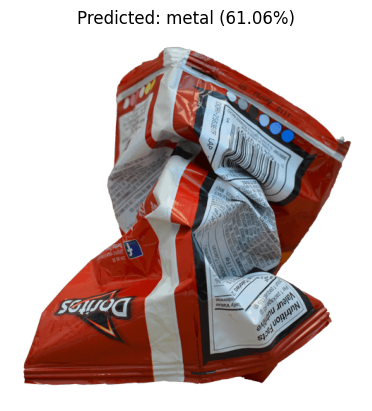

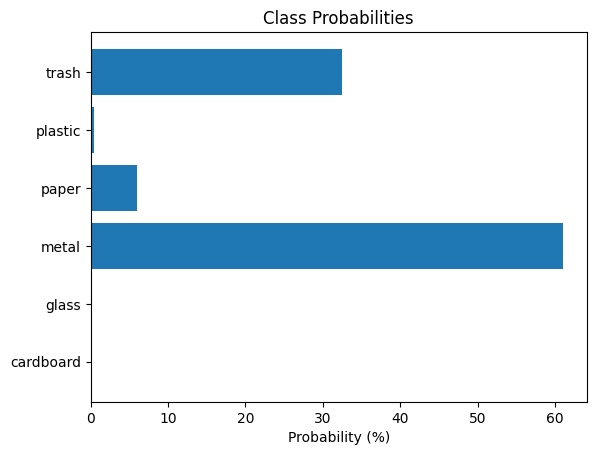

In [55]:
import matplotlib.pyplot as plt

def show_classification(image_path, result):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Predicted: {result['class']} ({result['confidence']})")
    plt.axis('off')
    plt.show()

    #Plotting probabilities
    plt.barh(result['all_probabilities'].keys(),
             [float(p.strip('%')) for p in result['all_probabilities'].values()])
    plt.xlabel('Probability (%)')
    plt.title('Class Probabilities')
    plt.show()

show_classification(image_path, result)

Training:   0%|          | 0/323 [00:00<?, ?it/s]

Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1.jpg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367.jpg
Epoch 1/5
Train Loss: 0.0141, Train Accuracy: 99.46%
Validation Loss: 0.0573, Validation Accuracy: 98.37%
✅ Best model saved at Epoch 1 with Validation Accuracy: 98.37%


Training:   0%|          | 0/323 [00:00<?, ?it/s]

Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1.jpg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367.jpg
Epoch 2/5
Train Loss: 0.0286, Train Accuracy: 99.68%
Validation Loss: 0.0382, Validation Accuracy: 98.84%
✅ Best model saved at Epoch 2 with Validation Accuracy: 98.84%


Training:   0%|          | 0/323 [00:00<?, ?it/s]

Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1.jpg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367.jpg
Epoch 3/5
Train Loss: 0.0212, Train Accuracy: 99.31%
Validation Loss: 0.0306, Validation Accuracy: 99.07%
✅ Best model saved at Epoch 3 with Validation Accuracy: 99.07%


Training:   0%|          | 0/323 [00:00<?, ?it/s]

Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367.jpg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1.jpg
Epoch 4/5
Train Loss: 0.0022, Train Accuracy: 99.92%
Validation Loss: 0.0277, Validation Accuracy: 99.07%


Training:   0%|          | 0/323 [00:00<?, ?it/s]

Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1.jpg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367.jpg
Epoch 5/5
Train Loss: 0.0031, Train Accuracy: 99.91%
Validation Loss: 0.0230, Validation Accuracy: 99.30%
✅ Best model saved at Epoch 5 with Validation Accuracy: 99.30%
📌 Final model saved at /content/drive/MyDrive/ND/saved_models_final/final_model.pth


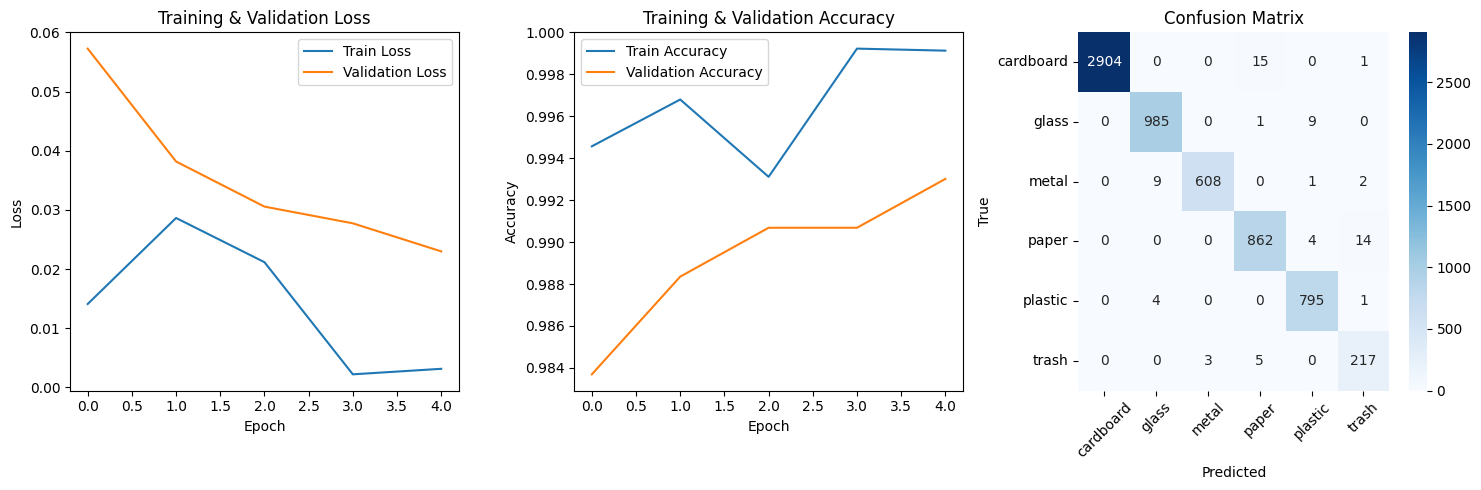

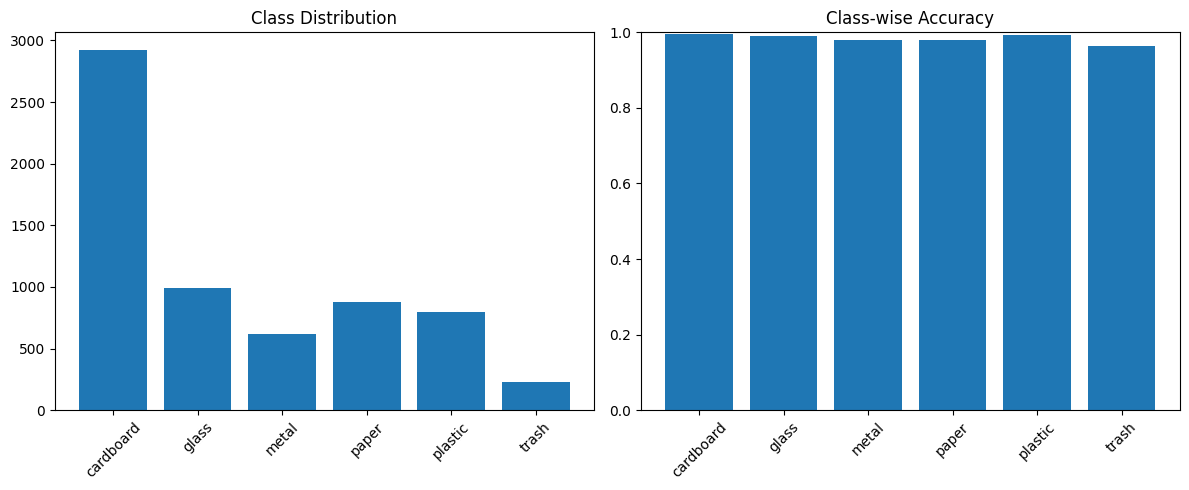

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

#Increasing epochs
epochs = 5
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

#Creating a directory to save models
save_dir = "/content/drive/MyDrive/ND/saved_models_final"
os.makedirs(save_dir, exist_ok=True)

best_val_accuracy = 0.0
best_model_path = os.path.join(save_dir, "best_model.pth")
final_model_path = os.path.join(save_dir, "final_model.pth")

#Initializing lists for metrics storage
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
all_preds = []
all_labels = []

#Training the model
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_accuracy, val_preds, val_labels = evaluate(model, val_loader, criterion, device)

    #Storing metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    all_preds.extend(val_preds)
    all_labels.extend(val_labels)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy*100:.2f}%")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy*100:.2f}%")

    #Saving the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Best model saved at Epoch {epoch+1} with Validation Accuracy: {val_accuracy*100:.2f}%")

#Saving the final model
torch.save(model.state_dict(), final_model_path)
print(f"📌 Final model saved at {final_model_path}")

#===== Visualization Section =====
plt.figure(figsize=(15, 5))

#Training and Validation Curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Confusion Matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#Class Distribution and Accuracy
class_counts = {cls: 0 for cls in dataset.classes}
for label in all_labels:
    class_counts[dataset.classes[label]] += 1

class_acc = {}
for cls in dataset.classes:
    cls_idx = dataset.class_to_idx[cls]
    mask = np.array(all_labels) == cls_idx
    if sum(mask) > 0:
        class_acc[cls] = np.mean(np.array(all_preds)[mask] == cls_idx)
    else:
        class_acc[cls] = 0

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(class_acc.keys(), class_acc.values())
plt.title('Class-wise Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [48]:
from sklearn.metrics import precision_score, f1_score
import numpy as np

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    return precision, f1

# Load Model 1 (from Code 1)
model1 = models.resnet18(pretrained=False)
model1.fc = nn.Linear(model1.fc.in_features, 6)
model1.load_state_dict(torch.load("/content/drive/MyDrive/ND/saved_models_final/best_model.pth"))
model1 = model1.to(device)

# Evaluate
precision1, f1_1 = evaluate_model(model1, test_loader, device)
print(f"Model 1 (Code 1) Metrics:")
print(f"Precision: {precision1:.4f}")
print(f"F1 Score: {f1_1:.4f}")

Model 1 (Code 1) Metrics:
Precision: 0.9940
F1 Score: 0.9938


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



Image: test_img.jpeg
cardboard: 0.0%
glass: 100.0%
metal: 0.0%
paper: 0.0%
plastic: 0.0%
trash: 0.0%

Image: test2_img.jpg
cardboard: 4.9%
glass: 0.0%
metal: 0.0%
paper: 95.1%
plastic: 0.0%
trash: 0.0%

Image: test3_img.jpeg
cardboard: 0.2%
glass: 0.0%
metal: 0.0%
paper: 99.8%
plastic: 0.0%
trash: 0.0%

Image: test4_img.jpeg
cardboard: 0.0%
glass: 0.0%
metal: 0.0%
paper: 100.0%
plastic: 0.0%
trash: 0.0%

Image: test5_img.png
cardboard: 0.0%
glass: 0.0%
metal: 0.0%
paper: 100.0%
plastic: 0.0%
trash: 0.0%


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


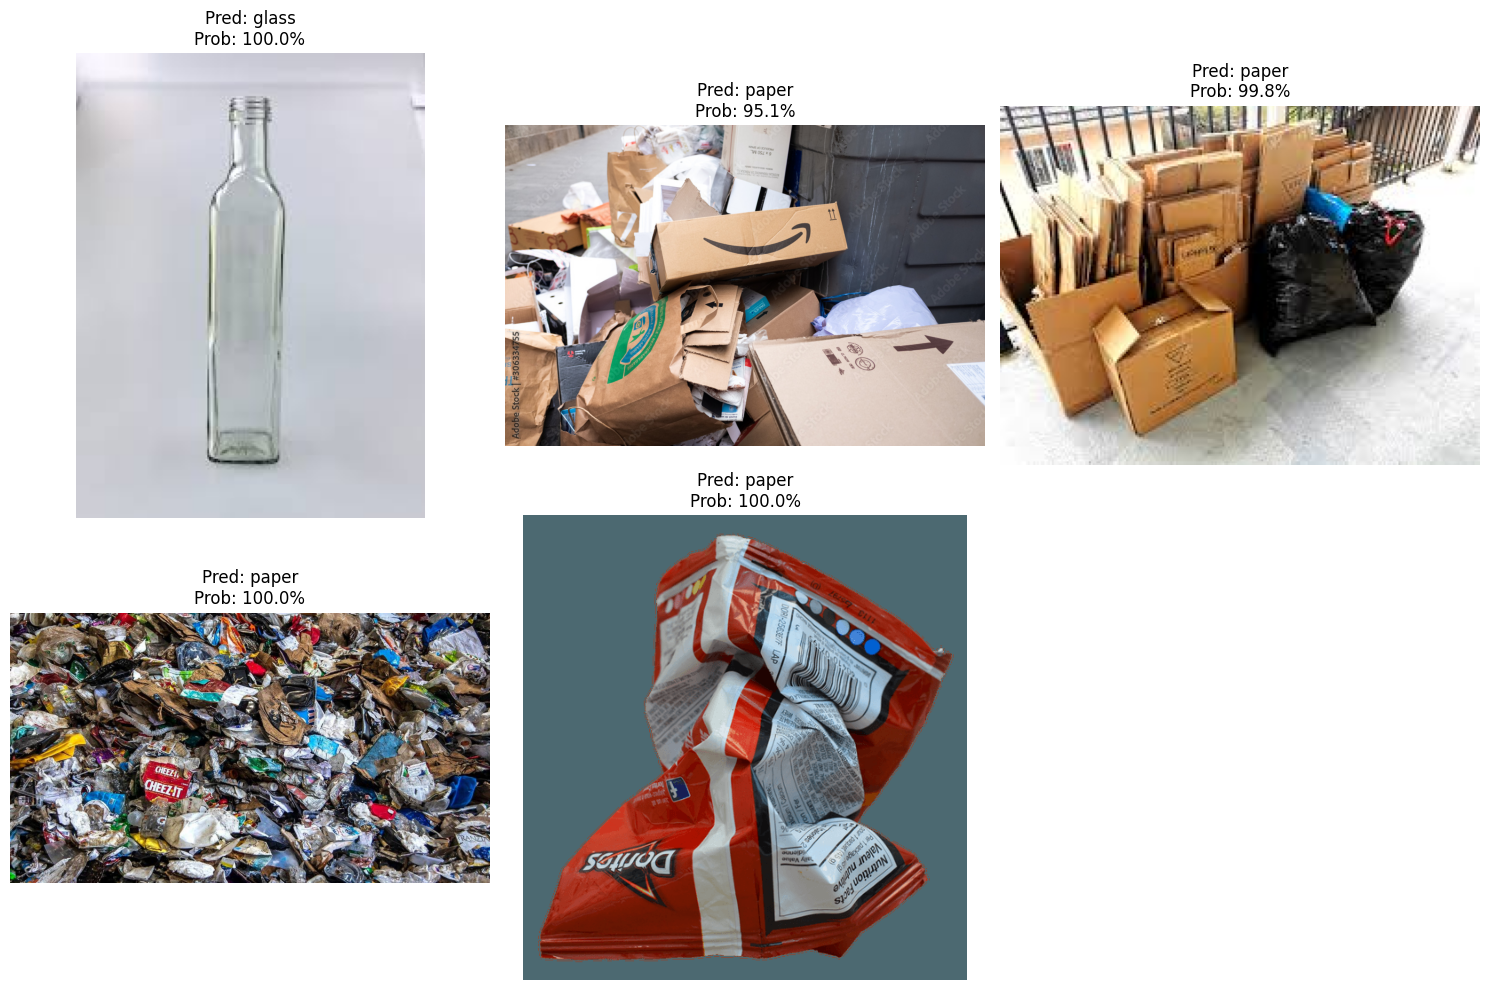

In [47]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

#Loading the saved model
model_path = "/content/drive/MyDrive/ND/saved_models_final/best_model.pth"
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 6)  #6 classes
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

#Defining test transforms (same as validation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#Getting class names from dataset
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

#Testing directory
test_dir = "/content/drive/MyDrive/ND/test_images"

#Processing each test image
plt.figure(figsize=(15, 10))
for i, img_file in enumerate(os.listdir(test_dir)):
    img_path = os.path.join(test_dir, img_file)

    try:
        #Loading and preprocessing image
        img = Image.open(img_path).convert('RGB')
        img_tensor = test_transform(img).unsqueeze(0).to(device)

        #Making prediction
        with torch.no_grad():
            outputs = model(img_tensor)
            _, pred = torch.max(outputs, 1)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)[0] * 100

        #Displaying results
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"Pred: {class_names[pred.item()]}\n"
                 f"Prob: {probabilities[pred.item()]:.1f}%")
        plt.axis('off')

        #Printing detailed probabilities
        print(f"\nImage: {img_file}")
        for idx, cls in enumerate(class_names):
            print(f"{cls}: {probabilities[idx]:.1f}%")

    except Exception as e:
        print(f"Skipping {img_file} due to error: {e}")

plt.tight_layout()
plt.show()

In [42]:
from sklearn.utils.class_weight import compute_class_weight

#Calculating class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_dataset.dataset.targets),
    y=train_dataset.dataset.targets
)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

#Modifying your loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [43]:
for cls, weight in zip(dataset.classes, class_weights.cpu().numpy()):
    print(f"{cls}: {weight:.2f}")

cardboard: 0.37
glass: 1.00
metal: 1.75
paper: 1.20
plastic: 1.48
trash: 5.22


Training:   0%|          | 0/323 [00:00<?, ?batch/s]

Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367.jpg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1.jpg


Validating:   0%|          | 0/41 [00:00<?, ?batch/s]


Epoch 1/5 Summary:
Train Loss: 0.0087 | Acc: 99.81%
Val Loss: 0.0493 | Acc: 99.22%

Class-wise Accuracy:
  trash       : 97.78%
  paper       : 98.30%
  glass       : 98.49%
  plastic     : 98.75%
  metal       : 99.19%
  cardboard   : 100.00%

🏆 New best model saved (Val Acc: 99.22%)


Training:   0%|          | 0/323 [00:00<?, ?batch/s]

Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367.jpg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1.jpg


Validating:   0%|          | 0/41 [00:00<?, ?batch/s]


Epoch 2/5 Summary:
Train Loss: 0.0066 | Acc: 99.89%
Val Loss: 0.0388 | Acc: 99.53%

Class-wise Accuracy:
  trash       : 95.56%
  paper       : 98.86%
  metal       : 99.19%
  glass       : 99.50%
  cardboard   : 100.00%
  plastic     : 100.00%

🏆 New best model saved (Val Acc: 99.53%)


Training:   0%|          | 0/323 [00:00<?, ?batch/s]

Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1.jpg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367.jpg


Validating:   0%|          | 0/41 [00:00<?, ?batch/s]


Epoch 3/5 Summary:
Train Loss: 0.0087 | Acc: 99.74%
Val Loss: 0.0423 | Acc: 99.46%

Class-wise Accuracy:
  trash       : 97.78%
  paper       : 98.30%
  metal       : 99.19%
  plastic     : 99.38%
  glass       : 99.50%
  cardboard   : 100.00%


Training:   0%|          | 0/323 [00:00<?, ?batch/s]

Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1.jpg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367.jpg


Validating:   0%|          | 0/41 [00:00<?, ?batch/s]


Epoch 4/5 Summary:
Train Loss: 0.0018 | Acc: 99.95%
Val Loss: 0.0359 | Acc: 99.53%

Class-wise Accuracy:
  trash       : 93.33%
  metal       : 99.19%
  paper       : 99.43%
  glass       : 99.50%
  cardboard   : 100.00%
  plastic     : 100.00%


Training:   0%|          | 0/323 [00:00<?, ?batch/s]

Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/glass/glass245_aug1_aug2.jpeg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard1.jpg
Skipping corrupted image: /content/drive/MyDrive/ND/dataset-resized/cardboard/cardboard367.jpg


Validating:   0%|          | 0/41 [00:00<?, ?batch/s]


Epoch 5/5 Summary:
Train Loss: 0.0043 | Acc: 99.90%
Val Loss: 0.0464 | Acc: 99.38%

Class-wise Accuracy:
  trash       : 93.33%
  paper       : 98.86%
  metal       : 99.19%
  plastic     : 99.38%
  cardboard   : 99.83%
  glass       : 100.00%


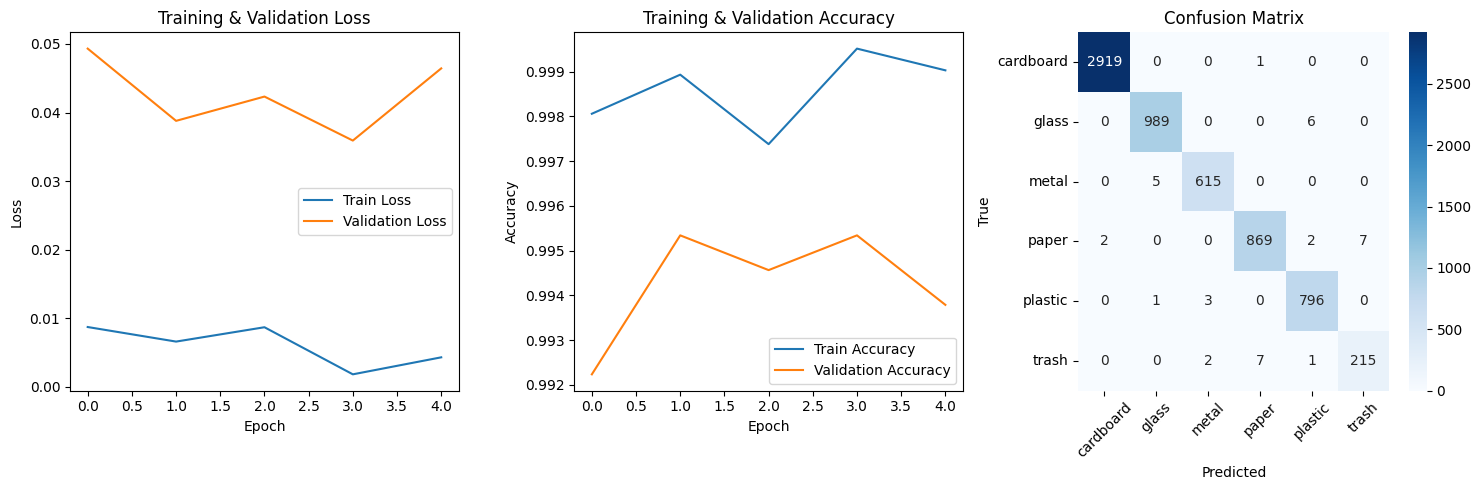

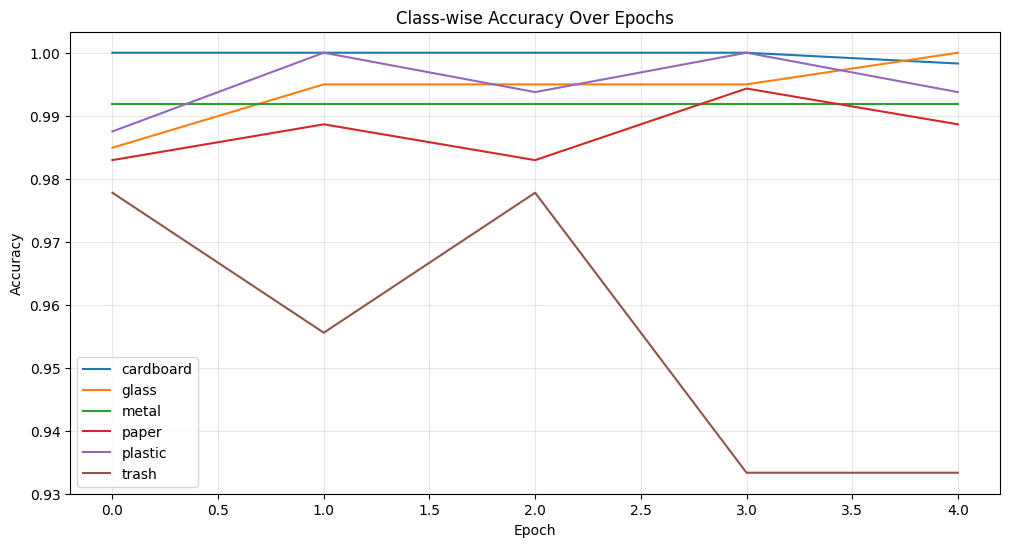

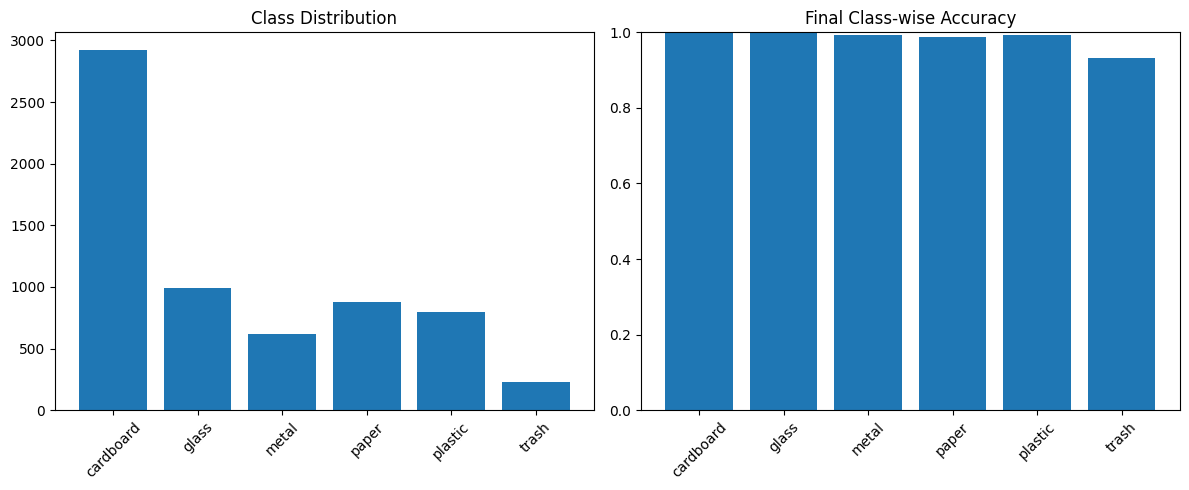

In [41]:
from tqdm.auto import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Enhanced training function with clean progress
def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    with tqdm(loader, unit="batch", desc="Training", leave=False) as pbar:
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            pbar.set_postfix({
                'loss': f"{total_loss/(pbar.n+1):.4f}",
                'acc': f"{correct/total:.2%}"
            })

    return total_loss/len(loader), correct/total

#Enhanced validation function
def validate_epoch(model, loader, criterion, device, class_names):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    class_stats = {cls: {'correct': 0, 'total': 0} for cls in class_names}

    with tqdm(loader, unit="batch", desc="Validating", leave=False) as pbar:
        with torch.no_grad():
            for images, labels in pbar:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

                for lbl, pred in zip(labels.cpu(), predicted.cpu()):
                    cls = class_names[lbl.item()]
                    class_stats[cls]['total'] += 1
                    if lbl == pred:
                        class_stats[cls]['correct'] += 1

                pbar.set_postfix({
                    'loss': f"{total_loss/(pbar.n+1):.4f}",
                    'acc': f"{correct/total:.2%}"
                })

    #Calculating class accuracies
    class_acc = {cls: stats['correct']/max(1, stats['total'])
                for cls, stats in class_stats.items()}

    return total_loss/len(loader), correct/total, class_acc, all_preds, all_labels

#Main training loop with clean output
def train_model(model, train_loader, val_loader, class_names, epochs=5):
    # Calculating class weights
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(train_dataset.dataset.targets),
        y=np.array(train_dataset.dataset.targets)
    )
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=0.00005)

    best_val_acc = 0
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': [],
        'class_acc': {cls: [] for cls in class_names},
        'all_preds': [], 'all_labels': []
    }

    for epoch in range(epochs):
        #Training phase
        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)

        #Validation phase
        val_loss, val_acc, class_acc, val_preds, val_labels = validate_epoch(
            model, val_loader, criterion, device, class_names)

        #Updating history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['all_preds'].extend(val_preds)
        history['all_labels'].extend(val_labels)
        for cls in class_names:
            history['class_acc'][cls].append(class_acc[cls])

        print(f"\nEpoch {epoch+1}/{epochs} Summary:")
        print(f"Train Loss: {train_loss:.4f} | Acc: {train_acc:.2%}")
        print(f"Val Loss: {val_loss:.4f} | Acc: {val_acc:.2%}")

        print("\nClass-wise Accuracy:")
        for cls, acc in sorted(class_acc.items(), key=lambda x: x[1]):
            print(f"  {cls:<12}: {acc:.2%}")

        #Saving the best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), best_model_path)
            print(f"\n🏆 New best model saved (Val Acc: {val_acc:.2%})")

    return history

#Running training
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    class_names=dataset.classes,
    epochs=5
)

#Saving final results
torch.save(model.state_dict(), final_model_path)
torch.save(history, os.path.join(save_dir, 'training_history.pth'))

#===== Visualization Section =====
plt.figure(figsize=(15, 5))

#Training and Validation Curves
plt.subplot(1, 3, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Confusion Matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(history['all_labels'], history['all_preds'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#Class-wise Accuracy Evolution
plt.figure(figsize=(12, 6))
for cls, acc in history['class_acc'].items():
    plt.plot(acc, label=cls)
plt.title('Class-wise Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Final Class Distribution and Accuracy
final_class_acc = {cls: acc[-1] for cls, acc in history['class_acc'].items()}
class_counts = {cls: 0 for cls in dataset.classes}
for label in history['all_labels']:
    class_counts[dataset.classes[label]] += 1

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(final_class_acc.keys(), final_class_acc.values())
plt.title('Final Class-wise Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [49]:
def evaluate_model_with_details(model, test_loader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall metrics
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    # Class-wise metrics
    class_precision = precision_score(all_labels, all_preds, average=None, zero_division=0)
    class_f1 = f1_score(all_labels, all_preds, average=None, zero_division=0)

    # Print class-wise results
    print("\nClass-wise Performance:")
    for i, cls in enumerate(class_names):
        print(f"{cls}: Precision = {class_precision[i]:.4f}, F1 = {class_f1[i]:.4f}")

    return precision, f1

# Load Model 2 (from Code 2)
model2 = models.resnet18(pretrained=False)
model2.fc = nn.Linear(model2.fc.in_features, 6)
model2.load_state_dict(torch.load("/content/drive/MyDrive/ND/saved_models_final_with_metrics/best_model.pth"))
model2 = model2.to(device)

# Evaluate
precision2, f1_2 = evaluate_model_with_details(model2, test_loader, device, dataset.classes)
print(f"\nModel 2 (Code 2) Metrics:")
print(f"Precision: {precision2:.4f}")
print(f"F1 Score: {f1_2:.4f}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



Class-wise Performance:
cardboard: Precision = 1.0000, F1 = 1.0000
glass: Precision = 1.0000, F1 = 1.0000
metal: Precision = 1.0000, F1 = 1.0000
paper: Precision = 1.0000, F1 = 1.0000
plastic: Precision = 1.0000, F1 = 1.0000
trash: Precision = 1.0000, F1 = 1.0000

Model 2 (Code 2) Metrics:
Precision: 1.0000
F1 Score: 1.0000


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



Image: test_img.jpeg
Predicted: glass (100.0%)
All class probabilities:
cardboard: 0.0%
glass: 100.0%
metal: 0.0%
paper: 0.0%
plastic: 0.0%
trash: 0.0%

Image: test2_img.jpg
Predicted: paper (98.8%)
All class probabilities:
cardboard: 1.2%
glass: 0.0%
metal: 0.0%
paper: 98.8%
plastic: 0.0%
trash: 0.0%

Image: test3_img.jpeg
Predicted: cardboard (99.5%)
All class probabilities:
cardboard: 99.5%
glass: 0.0%
metal: 0.0%
paper: 0.5%
plastic: 0.0%
trash: 0.0%

Image: test4_img.jpeg
Predicted: paper (72.0%)
All class probabilities:
cardboard: 0.0%
glass: 0.0%
metal: 28.0%
paper: 72.0%
plastic: 0.0%
trash: 0.0%


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Image: test5_img.png
Predicted: trash (98.0%)
All class probabilities:
cardboard: 0.2%
glass: 0.0%
metal: 0.0%
paper: 1.8%
plastic: 0.0%
trash: 98.0%


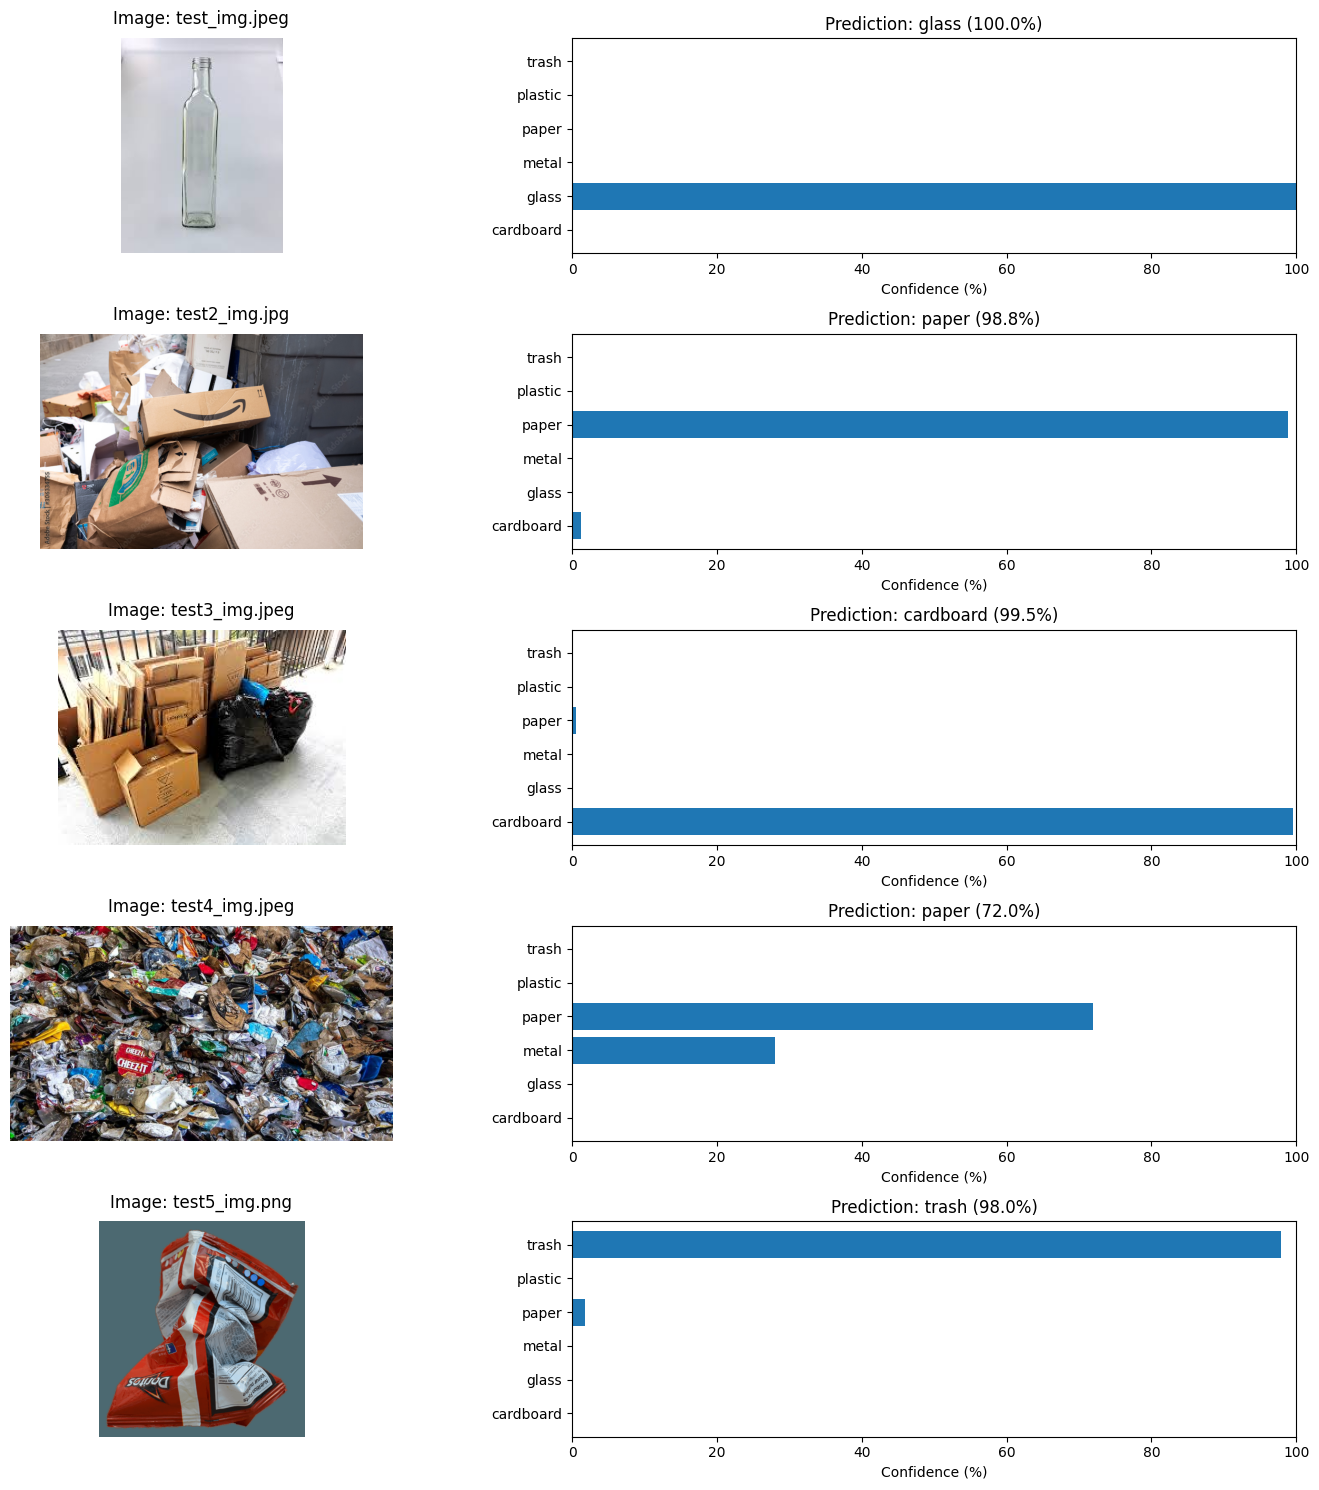

In [46]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

#Loading the saved model
model_path = "/content/drive/MyDrive/ND/saved_models_final_with_metrics/best_model.pth"
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 6)  #6 classes
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

#Defining test transforms (same as validation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#Getting class names from dataset
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

#Testing directory
test_dir = "/content/drive/MyDrive/ND/test_images"

#Processing each test image with confidence visualization
plt.figure(figsize=(15, 15))
for i, img_file in enumerate(os.listdir(test_dir)):
    img_path = os.path.join(test_dir, img_file)

    try:
        #Loading and preprocessing image
        img = Image.open(img_path).convert('RGB')
        img_tensor = test_transform(img).unsqueeze(0).to(device)

        #Making prediction
        with torch.no_grad():
            outputs = model(img_tensor)
            _, pred = torch.max(outputs, 1)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)[0] * 100

        #Creating visualization
        plt.subplot(len(os.listdir(test_dir)), 2, i*2+1)
        plt.imshow(img)
        plt.title(f"Image: {img_file}", pad=10)
        plt.axis('off')

        plt.subplot(len(os.listdir(test_dir)), 2, i*2+2)
        y_pos = np.arange(len(class_names))
        plt.barh(y_pos, probabilities.cpu().numpy(), align='center')
        plt.yticks(y_pos, class_names)
        plt.xlabel('Confidence (%)')
        plt.title(f"Prediction: {class_names[pred.item()]} ({probabilities[pred.item()]:.1f}%)")
        plt.xlim(0, 100)

        #Printing detailed results
        print(f"\nImage: {img_file}")
        print(f"Predicted: {class_names[pred.item()]} ({probabilities[pred.item()]:.1f}%)")
        print("All class probabilities:")
        for idx, cls in enumerate(class_names):
            print(f"{cls}: {probabilities[idx]:.1f}%")

    except Exception as e:
        print(f"Skipping {img_file} due to error: {e}")

plt.tight_layout()
plt.show()